# Computational Tests

This notebook is intended for running different kinds of analyses that would validate our reconstruction.

[1. Subsystem Overview and Analysis](#subsystems) <br>
[2. Context-specific Model Generation](#context_specific) <br>
[3. Biomass prediction using exp. data](#biomass) <br>
[4. Flux Enrichment Analysis](#fea) <br>

## 1. Subsystem Overview and Analysis <a id='subsystems'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from google_sheet import GoogleSheet

In [2]:
##### ----- Generate Subsystems datasets from Google Sheet ----- #####

#Credential file
KEY_FILE_PATH = 'credentials.json'

#CHO Network Reconstruction + Recon3D_v3 Google Sheet ID
SPREADSHEET_ID = '1MlBXeHIKw8k8fZyXm-sN__AHTRSunJxar_-bqvukZws'

# Initialize the GoogleSheet object
sheet = GoogleSheet(SPREADSHEET_ID, KEY_FILE_PATH)

# Read data from the Google Sheet
sheet_subsystems = 'Summary Systems'
sheet_reactions = 'Rxns'
subsystems = sheet.read_google_sheet(sheet_subsystems)
reactions_rec = sheet.read_google_sheet(sheet_reactions)

# Remove the total count
subsystems = subsystems.iloc[:-1, :]

In [ ]:
#### --- Pie Chart of the Amount of Reactions per System --- ####

subsystems["Number of Reactions"] = pd.to_numeric(subsystems["Number of Reactions"])

# Aggregate data by "System" and sum "Number of Reactions"
system_reactions = subsystems.groupby("System")["Number of Reactions"].sum()

# Set the figure and axes for more control
fig, ax = plt.subplots(figsize=(10, 7))

# Generate the pie chart again with the custom labels
patches, texts, autotexts = ax.pie(system_reactions, labels=system_reactions.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=140, colors=plt.cm.tab20.colors)

# Improve aesthetics
for text in texts + autotexts:
    text.set_color('black')
ax.set_title("Pie Chart of Number of Reactions by System", pad=30)  # Move the title upwards by increasing pad

# Set equal aspect ratio
ax.axis('equal')

# Save the plot
plt.savefig('../Plots/pie_chart_reactions_per_system.png')

# Display the plot
plt.show()

In [ ]:
# Generate the Sunburst Plot

fig = px.sunburst(subsystems, path=['System', 'Subsystems', 'Kegg Pathway'],
                  color='System')

# Convert to a Graph Objects figure
fig_go = go.Figure(fig)

# Update layout
fig_go.update_layout(width=1200, height=1000)

# Define font sizes
font_size_last_layer = 10
font_size_previous_layer = 15
default_font_size = 12

# Create a list to store font sizes
font_sizes = []

# Update font size for each level
for trace in fig_go.data:
    if isinstance(trace, go.Sunburst):
        for id in trace.ids:
            level = id.count("/")  # Determine level by the number of slashes in the id
            if level == 2:  # Last layer (Kegg Pathway)
                font_sizes.append(font_size_last_layer)
            elif level == 1:  # Previous layer (Subsystems)
                font_sizes.append(font_size_previous_layer)
            else:
                font_sizes.append(default_font_size)  # Default size for other layers

# Apply the font sizes to the figure
fig_go.update_traces(insidetextfont=dict(size=font_sizes))

# Save the figure
fig_go.write_html("../Plots/sunburst_subsystems.html")  # Save as interactive HTML file
fig_go.write_image("../Plots/sunburst_subsystems.png", width=1200, height=1000, scale=2)  # Increase resolution by setting scale parameter

# Show the plot
fig_go.show()

#### Auxotrophies

In [ ]:
from cobra.io import load_json_model

iCHO_path = "iCHO3595.json"
iCHO = load_json_model(iCHO_path)

In [ ]:
amino_acids = {
    "arginine": ["EX_arg_L_e", "EX_arg_D_e"],
    "asparagine": ["EX_asn_L_e", "EX_asn_D_e"],
    "cysteine": ["EX_cys_L_e", "EX_cys_D_e", "EX_Lcystin_e"],
    "histidine": ["EX_his_L_e", "EX_his_D_e"],
    "isoleucine": ["EX_ile_L_e", "EX_ile_D_e"],
    "leucine": ["EX_leu_L_e", "EX_leu_D_e"],
    "lysine": ["EX_lys_L_e", "EX_lys_D_e"],
    "methionine": ["EX_met_L_e", "EX_met_D_e"],
    "phenylalanine": ["EX_phe_L_e", "EX_phe_D_e"],
    "proline": ["EX_pro_L_e", "EX_pro_D_e"],
    "threonine": ["EX_thr_L_e", "EX_thr_D_e"],
    "tryptophan": ["EX_trp_L_e", "EX_trp_D_e"],
    "valine": ["EX_val_L_e", "EX_val_D_e"]
}
for amino_acid in amino_acids:
    # ----- Setup initial bounds -----
    for exchange_reaction in iCHO.exchanges:
        exchange_reaction.bounds = -10, 10

    # Arginine
    iCHO.reactions.get_by_id('GAUGE-R00557').bounds = 0, 10
    iCHO.reactions.get_by_id('GAUGE-R10107').bounds = 0, 0
    iCHO.reactions.get_by_id('GAUGE-R00558').bounds = 0, 0
    iCHO.reactions.get_by_id('GLYAMDTRc').bounds = 0, 0
    iCHO.reactions.get_by_id('GAUGE-R10107').bounds = 0, 0
    iCHO.reactions.get_by_id('EX_valarggly_e').bounds = 0, 10
    iCHO.reactions.get_by_id('ARGSL').bounds = 0, 0

    # Asparigine
    iCHO.reactions.get_by_id('ASNS1').bounds = 0, 0

    # Cysteine
    iCHO.reactions.get_by_id('r0129').bounds = 0, 0
    iCHO.reactions.get_by_id('EX_cgly_e').bounds = 0, 0
    iCHO.reactions.get_by_id('AMPTASECG').bounds = -10, 0
    iCHO.reactions.get_by_id('AMPTASECGe').bounds = -10, 0
    iCHO.reactions.get_by_id('CYSTGL').bounds = -10, 0
    iCHO.reactions.get_by_id('EX_HC00250_e').bounds = 0, 0
    iCHO.reactions.get_by_id('EX_sfcys_e').bounds = 0, 0

    # Histidine
    iCHO.reactions.get_by_id('VALTRPVALr').bounds = 0,0 

    # Isoleucine - DONE
    iCHO.reactions.get_by_id('EX_CE2916_e').bounds = 0,0 
    iCHO.reactions.get_by_id('EX_CE2915_e').bounds = 0,0 
    iCHO.reactions.get_by_id('ILETA').bounds = 0, 10
    iCHO.reactions.get_by_id('ILETAm').bounds = 0, 10

    # Leucine
    iCHO.reactions.get_by_id('LEULEULAPc').bounds = 0,0 
    iCHO.reactions.get_by_id('EX_leugly_e').bounds = 0,0 
    iCHO.reactions.get_by_id('EX_glyleu_e').bounds = 0,0 
    iCHO.reactions.get_by_id('LEUTA').bounds = 0, 10 
    iCHO.reactions.get_by_id('LEUTAm').bounds = 0, 10 
    iCHO.reactions.get_by_id('EX_CE5797_e').bounds = 0, 0

    # Lysine
    iCHO.reactions.get_by_id('EX_biocyt_e').bounds = 0,0 

    # Methionine
    iCHO.reactions.get_by_id('METS').bounds = -10, 0 
    iCHO.reactions.get_by_id('BHMT').bounds = -10, 0 
    iCHO.reactions.get_by_id('GAUGE-R00648').bounds = 0, 10 
    iCHO.reactions.get_by_id('UNK2').bounds = -10, 0 
    iCHO.reactions.get_by_id('UNK3').bounds = -10, 0 
    iCHO.reactions.get_by_id('TYRA').bounds = -10, 0 
    #iCHO.reactions.get_by_id('GAUGE-R06895').bounds = 0, 0 # Curated by MR with 1 score / Erased from the reconstruction

    # Phenylalanine
    iCHO.reactions.get_by_id('EX_CE5786_e').bounds = 0, 0 
    iCHO.reactions.get_by_id('EX_pheleu_e').bounds = 0, 0 
    iCHO.reactions.get_by_id('EX_glyphe_e').bounds = 0, 0 
    iCHO.reactions.get_by_id('EX_CE2917_e').bounds = 0, 0 
    iCHO.reactions.get_by_id('EX_CE5786_e').bounds = 0, 0 
    iCHO.reactions.get_by_id('EX_CE5789_e').bounds = 0, 0 
    iCHO.reactions.get_by_id('EX_phpyr_e').bounds = 0, 0 

    # Proline
    iCHO.reactions.get_by_id('EX_glypro_e').bounds = 0, 10
    iCHO.reactions.get_by_id('EX_progly_e').bounds = 0, 10
    iCHO.reactions.get_by_id('P5CR').bounds = 0, 0
    iCHO.reactions.get_by_id('P5CRxm').bounds = 0, 0
    iCHO.reactions.get_by_id('P5CRx').bounds = 0, 0
    iCHO.reactions.get_by_id('P5CRm').bounds = 0, 0
    iCHO.reactions.get_by_id('r1453').bounds = 0, 10

    # Threonine
    #iCHO.reactions.get_by_id('THRS').bounds = 0,0  # Erased from the reconstruction


    # Tryptophan
    iCHO.reactions.get_by_id('NBAHH_ir').bounds = 0,0  # Histidine hydrolase

    # Valine
    iCHO.reactions.get_by_id('EX_valarggly_e').bounds = 0, 10
    iCHO.reactions.get_by_id('EX_vallystyr_e').bounds = 0, 10
    iCHO.reactions.get_by_id('VALTA').bounds = 0, 10
    iCHO.reactions.get_by_id('VALTAm').bounds = 0, 10
    iCHO.reactions.get_by_id('EX_valval_e').bounds = 0, 10
    # -----------------------------------------

    for exchange_reaction in iCHO.exchanges:
        if exchange_reaction.id in amino_acids[amino_acid]:
            exchange_reaction.bounds = 0, 10
            # print(amino_acid, exchange_reaction.id, amino_acids[amino_acid])
    sol = iCHO.optimize()
    print(amino_acid, sol.objective_value)


In [ ]:
iCHO.metabolites.leu_L_c.summary()

#### Gene Deletion test

In [3]:
import pickle
import pandas as pd
from scipy.io import loadmat
from time import process_time
import cobra
from cobra.io import load_json_model, read_sbml_model


model = load_json_model('iCHO3595_unblocked.json')
iCHO1766 = read_sbml_model('../Data/Reconciliation/models/iCHOv1_final.xml')
iCHO2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
iCHO2441 = read_sbml_model('../Data/Reconciliation/models/iCHO2441.xml')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16


In [4]:
# Load the dataset for the experimentally validated essential genes

exp_essential_genes = pd.read_csv('../Data/Gene_Essentiality/cho_essential_genes.csv', sep='\t')
exp_essential_genes['gene'] = exp_essential_genes['gene'].str.replace('__1$', '', regex=True)

In [5]:
# Extract all gene names
all_gene_names = set()
for names in exp_essential_genes['gene']:
    for name in names.split('|'): #Extract the names of the genes with two aliases
        all_gene_names.add(name)

In [4]:
'''
# Generation gene ID of exp_essential_genes with biopython
from Bio import Entrez
import pandas as pd

# Set your email (this is required by NCBI for accessing their services)
Entrez.email = "dh.choi@orcid"

# Your dataset with gene symbols (replace with actual dataframe)
gene_symbols = exp_essential_genes.gene  # Example gene symbols

# Function to fetch gene ID using Entrez API
def get_gene_id(gene_symbol):
    search_handle = Entrez.esearch(db="gene", term=f"{gene_symbol}[Gene] AND Cricetulus griseus[Organism]")
    record = Entrez.read(search_handle)
    search_handle.close()
    if record["IdList"]:
        return record["IdList"][0]  # Return the first gene ID found
    else:
        return None

# Create a DataFrame to store gene symbols and their corresponding gene IDs
df = pd.DataFrame({'gene': gene_symbols})
df['entrez_gene_id'] = df['gene'].apply(get_gene_id)

# Display the result
print(df)

# Save the DataFrame to a pickle file
with open("gene_id_mapping.pkl", "wb") as f:
    pickle.dump(df, f)

# Save the result to a CSV file as well, if needed
df.to_csv("gene_id_mapping.csv", index=False)

'''

'\n# Generation gene ID of exp_essential_genes with biopython\nfrom Bio import Entrez\nimport pandas as pd\n\n# Set your email (this is required by NCBI for accessing their services)\nEntrez.email = "dh.choi@orcid"\n\n# Your dataset with gene symbols (replace with actual dataframe)\ngene_symbols = exp_essential_genes.gene  # Example gene symbols\n\n# Function to fetch gene ID using Entrez API\ndef get_gene_id(gene_symbol):\n    search_handle = Entrez.esearch(db="gene", term=f"{gene_symbol}[Gene] AND Cricetulus griseus[Organism]")\n    record = Entrez.read(search_handle)\n    search_handle.close()\n    if record["IdList"]:\n        return record["IdList"][0]  # Return the first gene ID found\n    else:\n        return None\n\n# Create a DataFrame to store gene symbols and their corresponding gene IDs\ndf = pd.DataFrame({\'gene\': gene_symbols})\ndf[\'entrez_gene_id\'] = df[\'gene\'].apply(get_gene_id)\n\n# Display the result\nprint(df)\n\n# Save the DataFrame to a pickle file\nwith open

In [6]:
# Load the DataFrame from the pickle file
with open("gene_id_mapping.pkl", "rb") as f:
    df_loaded = pickle.load(f)

# Display the loaded DataFrame
print(df_loaded)

          gene entrez_gene_id
0          Ubc      100689267
1       Ncaph2      100756862
2        Huwe1      100757403
3      Isg20l2      100752909
4        Coq8b      100770066
...        ...            ...
1975     Sprtn      100764217
1976     Perm1      100773289
1977   Tmem147      100751744
1978    Rnf216      100758416
1979  Rnaseh2b      100751948

[1980 rows x 2 columns]


In [7]:
# Load uptake and secretion rate "Intervals dict

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_wt_dict.pkl', 'rb') as file:
    uptsec_intrvl_wt = pickle.load(file)

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_zela_dict.pkl', 'rb') as file:
    uptsec_intrvl_zela = pickle.load(file)
    
temp_dict_zela = uptsec_intrvl_zela
temp_dict_wt = uptsec_intrvl_wt

In [ ]:
GM = model
# Constraint the model with exp data
temp_dict = temp_dict_zela
time = 'P2 to P4'

GM.solver = 'gurobi'
objective = 'biomass_cho_s' # 'biomass_cho'
GM.objective = objective

GM.reactions.biomass_cho_s.bounds = temp_dict['exp_growth_rate'][time]
for rxn in GM.boundary:
    
    # Models that are forced to secrete ethanol are not feasible
    if rxn.id == 'EX_etoh_e':
        rxn.bounds = (-0.1,0.1)
        continue

    # Replace the lower and upper bound with experimental data
    if rxn.id in temp_dict.keys():
        rxn.bounds = temp_dict[rxn.id][time]
        continue
    
    # Keep boundaries open for essential metabolites
    if rxn.id == 'EX_h2o_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_h_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_o2_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_hco3_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_so4_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_pi_e':
        rxn.bounds = (-1000,1000)
        continue

    # Boundaries from Sink reactions on iCHO_v1 (100 times lower)
    if rxn.id == 'SK_Asn_X_Ser_Thr_r':
        rxn.bounds = (-0.001,1000)
        continue
    if rxn.id == 'SK_Tyr_ggn_c':
        rxn.bounds = (-0.001,1000)
        continue
    if rxn.id == 'SK_Ser_Thr_g':
        rxn.bounds = (-0.001,1000)
        continue
    if rxn.id == 'SK_pre_prot_r':
        rxn.bounds = (-0.0006,1000)
        continue

    # Close uptake rates for the rest of the boundaries
    if rxn.id.startswith("EX_"):
        rxn.bounds = (0,1000) 
    if rxn.id.startswith("SK_"):
        rxn.bounds = (0,1000)
    if rxn.id.startswith("DM_"):
        rxn.bounds = (0,1000)
    
pfba_solution = cobra.flux_analysis.pfba(GM)
pfba_obj = pfba_solution.fluxes[objective]
print(pfba_obj)

In [ ]:
from cobra.flux_analysis.variability import find_essential_genes

# Find the essential genes for the given model
essential_genes = find_essential_genes(model)

# Print the number of essential genes for biomass
print(f"Number of essential genes for biomass: {len(essential_genes)}")
print("Essential genes for biomass production:")

# Iterate over the essential genes and print them (essential_genes is a set)
for gene in essential_genes:
    print(f"{gene.id}: {gene.name}")

# Create a reverse lookup dictionary where the key is the Entrez Gene ID and the value is the gene symbol
entrez_dict = df_loaded.set_index('entrez_gene_id')['gene'].to_dict()

# Now, match essential genes with Entrez Gene IDs and print the results
print("Essential genes for biomass production with matching Entrez Gene IDs:")

# Iterate over the essential genes and match them with Entrez Gene IDs
for gene in essential_genes:
    # Check if the gene.name matches any Entrez Gene ID in the dictionary
    entrez_id = entrez_dict.get(gene.name, "No Match")  # You can also try gene.id if it's closer to Entrez IDs
    
    # Print the gene along with its corresponding Entrez Gene ID (if matched)
    print(f"{gene.id}: {gene.name}, Entrez Gene ID: {entrez_id}")


In [ ]:
# Create an empty list to store the results
matched_genes = []

# Iterate over the essential genes
for gene in essential_genes:
    gene_exp_ess = model.genes.get_by_id(gene.id)  # Get the gene from the model

    # Check if the gene.id matches any Entrez Gene ID in the reverse dictionary
    if gene_exp_ess.id in entrez_dict:
        # If it matches, retrieve the corresponding gene symbol
        entrez_gene_symbol = entrez_dict[gene_exp_ess.id]
        print(f"{gene_exp_ess.id}: {gene_exp_ess.name}, Entrez Gene Symbol: {entrez_gene_symbol}")

        # Append the matched result to the list
        matched_genes.append((gene_exp_ess.id, gene_exp_ess.name, entrez_gene_symbol))
    else:
        print(f"{gene_exp_ess.id}: {gene_exp_ess.name}, No Entrez Gene Match")

# Convert the matched list into a DataFrame if needed
matched_genes_essential_df = pd.DataFrame(matched_genes, columns=['gene_exp_ess.id', 'gene_exp_ess.name', 'entrez_gene_symbol'])

# Save the result to a CSV file
matched_genes_essential_df.to_csv("matched_gene_entrez_ids_feg.csv", index=False)

# Optional: Print the DataFrame
print(matched_genes_essential_df)

In [ ]:
# Find rows where entrez_gene_id is None (indicating no match was found)
no_match_df = df_loaded[df_loaded['entrez_gene_id'].isnull()]
len(no_match_df)

In [ ]:
len(matched_genes_essential_df)

#### Iterating Condition-Specific Constraints and Identifyng Matched Essential Genes

In [13]:
import pickle
import pandas as pd
from scipy.io import loadmat
from time import process_time
import cobra
from cobra.io import load_json_model, read_sbml_model
from cobra.flux_analysis.variability import find_essential_genes

# model = load_json_model('iCHO3595_unblocked.json')
iCHO1766 = read_sbml_model('../Data/Reconciliation/models/iCHOv1_final.xml')
iCHO2291 = read_sbml_model('../Data/Reconciliation/models/iCHO2291.xml')
iCHO2101 = load_json_model('../Data/Reconciliation/models/iCHO2101.json')
iCHO3K = load_json_model('iCHO3595.json')

In [11]:
objective = 'biomass_cho'
pfba_solution = cobra.flux_analysis.pfba(iCHO2101)
pfba_obj = pfba_solution.fluxes[objective]
tmp = iCHO2101.reactions.get_by_id(objective)
print(tmp)

biomass_cho: 0.44909 ala_L[c] + 0.24693 arg_L[c] + 0.20889 asn_L[c] + 0.25757 asp_L[c] + 29.9348 atp[c] + 0.086971 chsterol[c] + 0.0066321 clpn_cho[c] + 0.097355 ctp[c] + 0.083084 cys_L[c] + 0.035778 datp[c] + 0.025173 dctp[c] + 0.025173 dgtp[c] + 0.035778 dttp[c] + 0.35321 gln_L[c] + 0.30325 glu_L[c] + 0.47669 gly[c] + 0.025686 glygn2[c] + 0.10294 gtp[c] + 24.7485 h2o[c] + 0.096216 his_L[c] + 0.22017 ile_L[c] + 0.42729 leu_L[c] + 0.38764 lys_L[c] + 0.10558 met_L[c] + 0.0017194 pa_cho[c] + 0.018177 pail_cho[c] + 0.13019 pchol_cho[c] + 0.049864 pe_cho[c] + 0.0014738 pglyc_cho[c] + 0.18672 phe_L[c] + 0.22206 pro_L[c] + 0.016457 ps_cho[c] + 0.323 ser_L[c] + 0.02137 sphmyln_cho[c] + 0.010837 tag_cho[c] + 0.25537 thr_L[c] + 0.025173 trp_L[c] + 0.13125 tyr_L[c] + 0.085376 utp[c] + 0.32263 val_L[c] + 0.055982 xolest_cho[c] --> 29.8303 adp[c] + 29.8303 h[c] + 29.8303 pi[c] + 0.5121 ppi[c]


In [14]:

reaction_list = [
    {"reaction_code": "HEX1", "reactants": ["glc_D_c"], "products": ["g6p_c"]},
    {"reaction_code": "PGI", "reactants": ["g6p_c"], "products": ["f6p_c"]},
    {"reaction_code": "PFK", "reactants": ["f6p_c"], "products": ["fdp_c"]},
    {"reaction_code": "FBA", "reactants": ["fdp_c"], "products": ["dhap_c", "g3p_c"]},
    {"reaction_code": "TPI", "reactants": ["dhap_c"], "products": ["g3p_c"]},
    {"reaction_code": "GAPD", "reactants": ["g3p_c"], "products": ["13dpg_c"]},
    {"reaction_code": "PGK", "reactants": ["13dpg_c"], "products": ["3pg_c"]},
    {"reaction_code": "DPGM", "reactants": ["13dpg_c"], "products": ["23dpg_c"]},
    {"reaction_code": "DPGase", "reactants": ["23dpg_c"], "products": ["3pg_c"]},
    {"reaction_code": "BPGP", "reactants": ["23dpg_c"], "products": ["2pg_c"]},
    {"reaction_code": "PGM", "reactants": ["3pg_c"], "products": ["2pg_c"]},
    {"reaction_code": "ENO", "reactants": ["2pg_c"], "products": ["pep_c"]},
    {"reaction_code": "PYK", "reactants": ["pep_c"], "products": ["pyr_c"]},
    {"reaction_code": "PDHm", "reactants": ["pyr_m"], "products": ["accoa_m"]},
    {"reaction_code": "LDH_L", "reactants": ["pyr_c"], "products": ["lac_L_c"]},
    {"reaction_code": "ALCD2if", "reactants": ["etoh_c"], "products": ["acald_c"]},
    {"reaction_code": "ALDD2x", "reactants": ["acald_c"], "products": ["ac_c"]},
    {"reaction_code": "ACS", "reactants": ["ac_c"], "products": ["accoa_c"]},
    {"reaction_code": "GALM2", "reactants": ["glc_D_c"], "products": ["bglc_D_c"]},
    {"reaction_code": "HEX2", "reactants": ["bglc_D_c"], "products": ["bg6p_c"]},
    {"reaction_code": "HMR_7748", "reactants": ["bg6p_c"], "products": ["g6p_c"]},
    {"reaction_code": "HMR_7749", "reactants": ["bg6p_c"], "products": ["f6p_c"]},
    {"reaction_code": "PGMT", "reactants": ["g1p_c"], "products": ["g6p_c"]},
    {"reaction_code": "G6PPer", "reactants": ["g6p_r"], "products": ["glc_D_r"]},
    {"reaction_code": "FBP", "reactants": ["fdp_c"], "products": ["f6p_c"]},
    {"reaction_code": "r0122", "reactants": ["pep_c"], "products": ["pyr_c"]},
    {"reaction_code": "r0153", "reactants": ["pep_c"], "products": ["pyr_c"]},
    {"reaction_code": "r0165", "reactants": ["pep_c"], "products": ["pyr_c"]},
    {"reaction_code": "r0280", "reactants": ["pep_c"], "products": ["pyr_c"]},
    {"reaction_code": "r0413", "reactants": ["pep_c"], "products": ["pyr_c"]},
    {"reaction_code": "G3PD2m", "reactants": ["glyc3p_c"], "products": ["dhap_c"]},
    {"reaction_code": "r0202", "reactants": ["glyc3p_x"], "products": ["dhap_x"]},
    {"reaction_code": "Adpgk", "reactants": ["glc_D_r"], "products": ["g6p_r"]},
    {"reaction_code": "HMR_7747", "reactants": ["bglc_D_c"], "products": ["bg6p_c"]},
    {"reaction_code": "PEPCK", "reactants": ["oaa_c"], "products": ["pep_c"]},
    {"reaction_code": "PEPCKm", "reactants": ["oaa_m"], "products": ["pep_m"]},
    {"reaction_code": "GDPGPH", "reactants": ["gdpglc_c"], "products": ["g1p_c"]},
    {"reaction_code": "r0354", "reactants": ["glc_D_c"], "products": ["g6p_c"]},
    {"reaction_code": "r0355", "reactants": ["glc_D_c"], "products": ["g6p_c"]}
]

def filter_reactions(model, reaction_list):
    filtered_reactions = []

    for rxn in model.reactions:
        # Extract the reactants and products of the reaction
        rxn_reactants = [met.id for met in rxn.reactants]
        rxn_products = [met.id for met in rxn.products]

        for reaction_data in reaction_list:
            target_reactants = reaction_data["reactants"]
            target_products = reaction_data["products"]

            # Check if the provided reactants and products are present in the model reaction
            reactants_match = set(target_reactants).issubset(rxn_reactants)
            products_match = set(target_products).issubset(rxn_products)

            # Check the reverse case (reactants <-> products)
            reverse_reactants_match = set(target_reactants).issubset(rxn_products)
            reverse_products_match = set(target_products).issubset(rxn_reactants)

            # Filter reactions if either direct or reverse match is found
            if (reactants_match and products_match) or (reverse_reactants_match and reverse_products_match):
                filtered_reactions.append((rxn.id, rxn.reaction))

    return filtered_reactions

# Print the filtered reactions
filtered_reactions = filter_reactions(iCHO3K, reaction_list)

for rxn_id, reaction in filtered_reactions:
    print(f"Reaction ID: {rxn_id}, Reaction: {reaction}")


Reaction ID: BPGP, Reaction: 23dpg_c + h2o_c --> 2pg_c + pi_c
Reaction ID: r0191, Reaction: f6p_c + utp_c --> fdp_c + h_c + udp_c
Reaction ID: r0191, Reaction: f6p_c + utp_c --> fdp_c + h_c + udp_c
Reaction ID: ACS, Reaction: ac_c + atp_c + coa_c --> accoa_c + amp_c + ppi_c
Reaction ID: ACYP, Reaction: 13dpg_c + h2o_c --> 3pg_c + h_c + pi_c
Reaction ID: Adpgk, Reaction: adp_r + glc_D_r --> amp_r + g6p_r + h_r
Reaction ID: Adpgk, Reaction: adp_r + glc_D_r --> amp_r + g6p_r + h_r
Reaction ID: ALCD2if, Reaction: etoh_c + nad_c --> acald_c + h_c + nadh_c
Reaction ID: ALCD2yf, Reaction: etoh_c + nadp_c --> acald_c + h_c + nadph_c
Reaction ID: ALDD2x, Reaction: acald_c + h2o_c + nad_c --> ac_c + 2.0 h_c + nadh_c
Reaction ID: ALDD2y, Reaction: acald_c + h2o_c + nadp_c --> ac_c + 2.0 h_c + nadph_c
Reaction ID: CBPPer, Reaction: cbp_r + glc_D_r + h_r --> co2_r + g6p_r + nh4_r
Reaction ID: CBPPer, Reaction: cbp_r + glc_D_r + h_r --> co2_r + g6p_r + nh4_r
Reaction ID: DPGase, Reaction: 23dpg_c + 

In [18]:
with open("../Analyses/growth_rate_pred/flux_sampling/Sampling_WT_P6_Bio142_600.pkl", "rb") as f:
    Sampling_WT_P6_Bio142_600_pk = pickle.load(f)

# Display the loaded DataFrame
print(Sampling_WT_P6_Bio142_600_pk)

         ASNN     ASNNm     ASNS1      ASPTA     ASPTAm  GAUGE-R00270  \
0    0.000009  0.000018  0.001288   0.243355  -0.253172     -0.003706   
1    0.000033  0.000018  0.001293   0.809605  -0.819468     -0.003706   
2    0.000032  0.000172  0.001448   0.757375  -0.767239     -0.003706   
3    0.000032  0.000454  0.001447   1.111766  -1.121321     -0.003704   
4    0.000032  0.000452  0.001447   0.698953  -0.708508     -0.003703   
..        ...       ...       ...        ...        ...           ...   
595  0.000025  0.000695  0.000141   2.555396  -2.876782     -0.002839   
596  0.000083  0.000748  0.000168  19.220096 -19.541767     -0.002587   
597  0.000083  0.001465  0.000878  19.267435 -19.589118     -0.002588   
598  0.000113  0.001506  0.000877  19.338459 -19.591211     -0.002579   
599  0.001089  0.002358  0.001866  12.022457 -12.274962     -0.002797   

        ADMDC       ARD        DDPGAm      EHGLAT2m  ...  DM_dgpi_prot_cho_r  \
0    0.016771  0.000018  5.811485e-07  1.42

In [20]:
def filter_reactions_to_dict(model, reaction_list):
    reaction_dict = {}

    for rxn in model.reactions:
        # Extract the reactants and products of the reaction
        rxn_reactants = [met.id for met in rxn.reactants]
        rxn_products = [met.id for met in rxn.products]

        for reaction_data in reaction_list:
            target_reactants = reaction_data["reactants"]
            target_products = reaction_data["products"]

            # Check if the provided reactants and products are present in the model reaction
            reactants_match = set(target_reactants).issubset(rxn_reactants)
            products_match = set(target_products).issubset(rxn_products)

            # Check the reverse case (reactants <-> products)
            reverse_reactants_match = set(target_reactants).issubset(rxn_products)
            reverse_products_match = set(target_products).issubset(rxn_reactants)

            # Create key for direct and reverse matches
            if reactants_match and products_match:
                key = f"{' + '.join(target_reactants)} → {' + '.join(target_products)}"
            elif reverse_reactants_match and reverse_products_match:
                key = f"{' + '.join(target_products)} → {' + '.join(target_reactants)}"
            else:
                continue

            # Add the reaction to the dictionary
            if key not in reaction_dict:
                reaction_dict[key] = []
            if rxn.id not in reaction_dict[key]:
                reaction_dict[key].append(rxn.id)

    return reaction_dict

# Example usage
filtered_reaction_dict = filter_reactions_to_dict(iCHO3K, reaction_list)

# Print the resulting dictionary
for key, rxn_ids in filtered_reaction_dict.items():
    print(f"{key}: {', '.join(rxn_ids)}")


23dpg_c → 2pg_c: BPGP
f6p_c → fdp_c: r0191, PFK
ac_c → accoa_c: ACS
13dpg_c → 3pg_c: ACYP, GBPS
glc_D_r → g6p_r: Adpgk, CBPPer
etoh_c → acald_c: ALCD2if, ALCD2yf, ETOHMO
acald_c → ac_c: ALDD2x, ALDD2y
23dpg_c → 3pg_c: DPGase
13dpg_c → 23dpg_c: DPGM
2pg_c → pep_c: ENO
fdp_c → dhap_c + g3p_c: FBA
fdp_c → f6p_c: FBP
glyc3p_c → dhap_c: G3PD2m, r0205, G3PD1
g6p_r → glc_D_r: G6PPer
g3p_c → 13dpg_c: GAPD
glc_D_c → g6p_c: HEX1, r0354, r0355
bglc_D_c → bg6p_c: HEX2, HMR_7747
bg6p_c → g6p_c: HMR_7748
bg6p_c → f6p_c: HMR_7749
lac_L_c → pyr_c: LDH_L, r2097, L_LACDcm
pyr_m → accoa_m: PDHm
oaa_c → pep_c: PEPCK
oaa_m → pep_m: PEPCKm
g6p_c → f6p_c: PGI
3pg_c → 13dpg_c: PGK
2pg_c → 3pg_c: PGM
g1p_c → g6p_c: PGMT
pep_c → pyr_c: PYK, r0122, r0153, r0165, r0280, r0413, RE2954C, PGAM1_PhosHydro
glyc3p_x → dhap_x: r0202
dhap_c → g3p_c: TPI
glc_D_c → bglc_D_c: GALM2
gdpglc_c → g1p_c: GDPGPH
dhap_c → glyc3p_c: HMR_0478
accoa_c → ac_c: ACOAHi


In [30]:
import pickle

# Load the saved flux sampling data
with open("../Analyses/growth_rate_pred/flux_sampling/Sampling_WT_P6_Bio142_600.pkl", 'rb') as f:
    flux_sampling_df = pickle.load(f)
    


# Initialize an empty DataFrame to store the summed flux values
summed_flux_df = pd.DataFrame(index=flux_sampling_df.index)

# Iterate over the filtered_reaction_dict
for reactant, reactions in filtered_reaction_dict.items():
    total_flux = pd.Series(0, index=flux_sampling_df.index)  # Initialize total flux with zeros for all rows
    
    # Iterate through the list of reactions
    for reaction in reactions:
        if reaction in flux_sampling_df.columns:
            # Add the flux values of the matching reactions
            total_flux += flux_sampling_df[reaction]
        else:
            print(f"Warning: Reaction {reaction} not found in the flux sampling data.")
    
    # Create a new column in the summed_flux_df named after the reactant
    column_name = f"{reactant}_summed_flux"
    summed_flux_df[column_name] = total_flux

# Display the summed flux DataFrame
print(summed_flux_df)

# Optionally save the result to a CSV file if needed
summed_flux_df.to_csv('summed_fluxes_filtered_reactions.csv', index=False)

     23dpg_c → 2pg_c_summed_flux  f6p_c → fdp_c_summed_flux  \
0                       0.000029                   0.209843   
1                       0.000029                   0.333808   
2                       0.000029                   0.335401   
3                       0.000029                   0.364173   
4                       0.000029                   0.380238   
..                           ...                        ...   
595                     0.000002                  15.161911   
596                     0.000028                  34.059663   
597                     0.000037                  34.071004   
598                     0.000135                  34.470361   
599                     0.000144                  19.099259   

     ac_c → accoa_c_summed_flux  13dpg_c → 3pg_c_summed_flux  \
0                      0.000164                 7.066970e-06   
1                      0.000164                 7.066457e-06   
2                      0.000156                 7.0

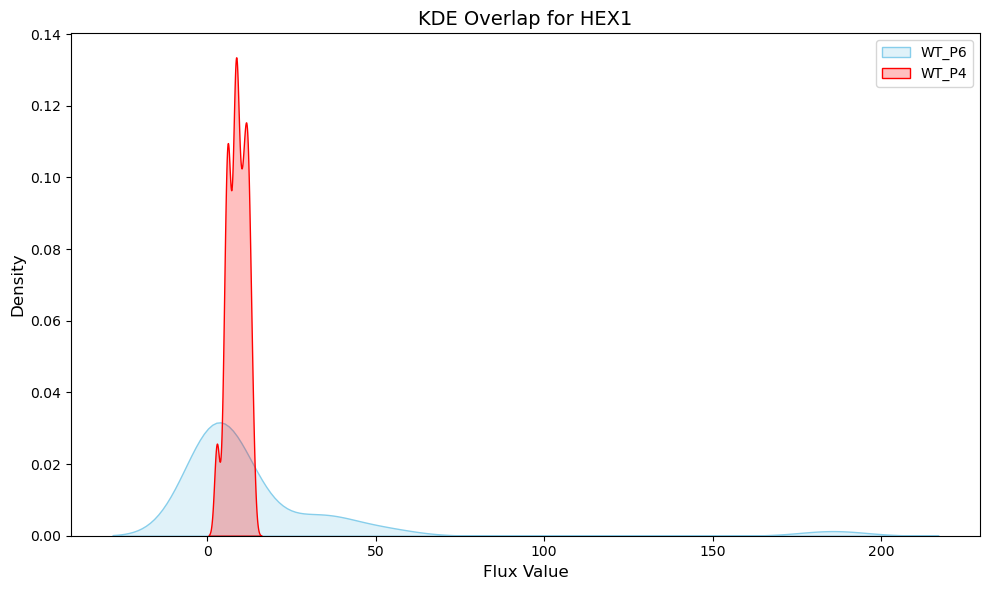

In [39]:
import pickle

# Load the saved flux sampling data
with open("../Analyses/growth_rate_pred/flux_sampling/Sampling_WT_P6_Bio142_600.pkl", 'rb') as f:
    WT_P6_flux_sampling_df = pickle.load(f)
# Load the saved flux sampling data
with open("../Analyses/growth_rate_pred/flux_sampling/Sampling_WT_P4_Bio142_600.pkl", 'rb') as f:
    WT_P4_flux_sampling_df = pickle.load(f)


# Select specific reactions for comparison
reaction_to_plot = 'HEX1'  # Change this to the desired reaction

# Plot the KDE for WT_P6_flux_sampling (sky blue) and WT_P4_flux_sampling (red)
plt.figure(figsize=(10, 6))

# Plot the first dataset (sky blue)
sns.kdeplot(WT_P6_flux_sampling_df[reaction_to_plot], color='skyblue', fill=True, label='WT_P6', warn_singular=False)

# Plot the second dataset (red)
sns.kdeplot(WT_P4_flux_sampling_df[reaction_to_plot], color='red', fill=True, label='WT_P4', warn_singular=False)

# Customize the plot
plt.title(f'KDE Overlap for {reaction_to_plot}', fontsize=14)
plt.xlabel('Flux Value', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

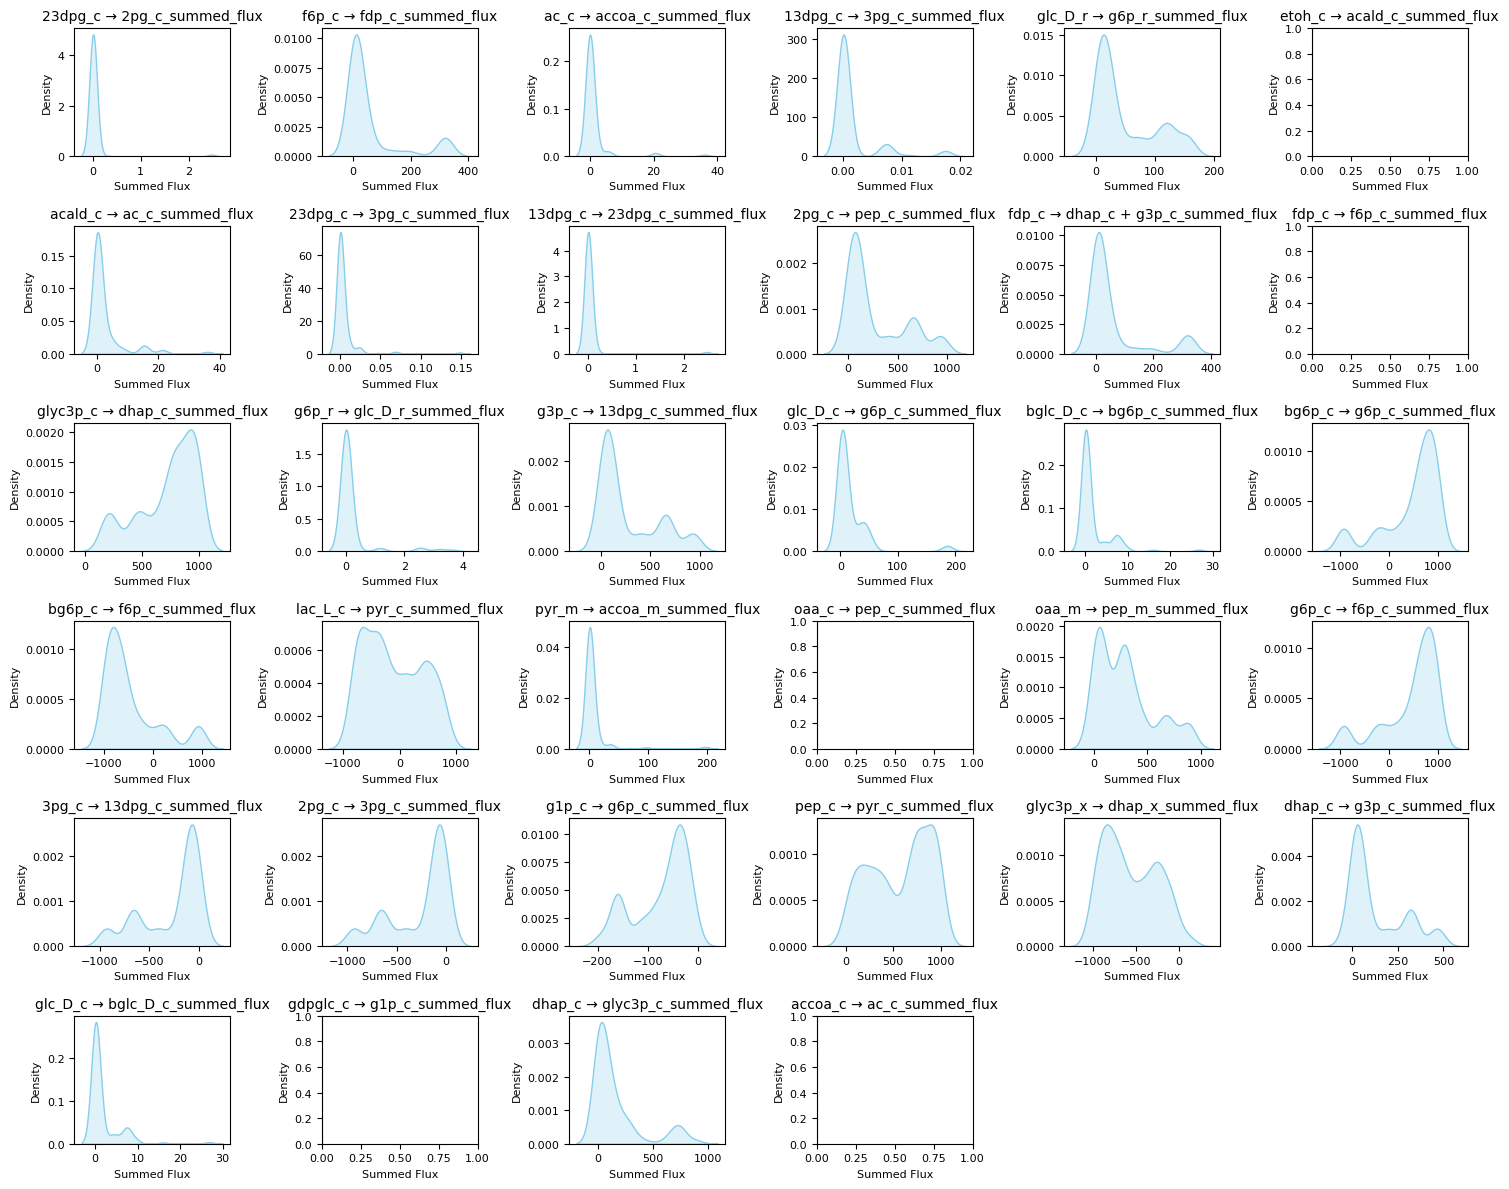

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Determine the number of columns in the DataFrame
num_columns = len(summed_flux_df.columns)

# Set up grid dimensions: e.g., 3 rows, 3 columns per figure
nrows = 6
ncols = 6
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))  # Adjust figsize for proper scaling
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column in the grid
for i, column in enumerate(summed_flux_df.columns):
    ax = axes[i]
    # Check if the column has zero variance
    if summed_flux_df[column].var() == 0:
        # If variance is zero, plot a vertical line at the constant value
        constant_value = summed_flux_df[column].iloc[0]
        ax.axvline(constant_value, color='red', linestyle='--')
        ax.set_title(f'Constant value: {constant_value}', fontsize=10)
    else:
        # Plot only KDE curve
        sns.kdeplot(summed_flux_df[column], ax=ax, color='skyblue', fill=True,warn_singular=False, common_norm=False)

    # Set the title for each subplot
    ax.set_title(f'{column}', fontsize=10)
    ax.set_xlabel('Summed Flux', fontsize=8)
    ax.set_ylabel('Density', fontsize=8)

    # Adjust tick size
    ax.tick_params(axis='both', labelsize=8)

# Remove empty subplots if number of columns is not a perfect square
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

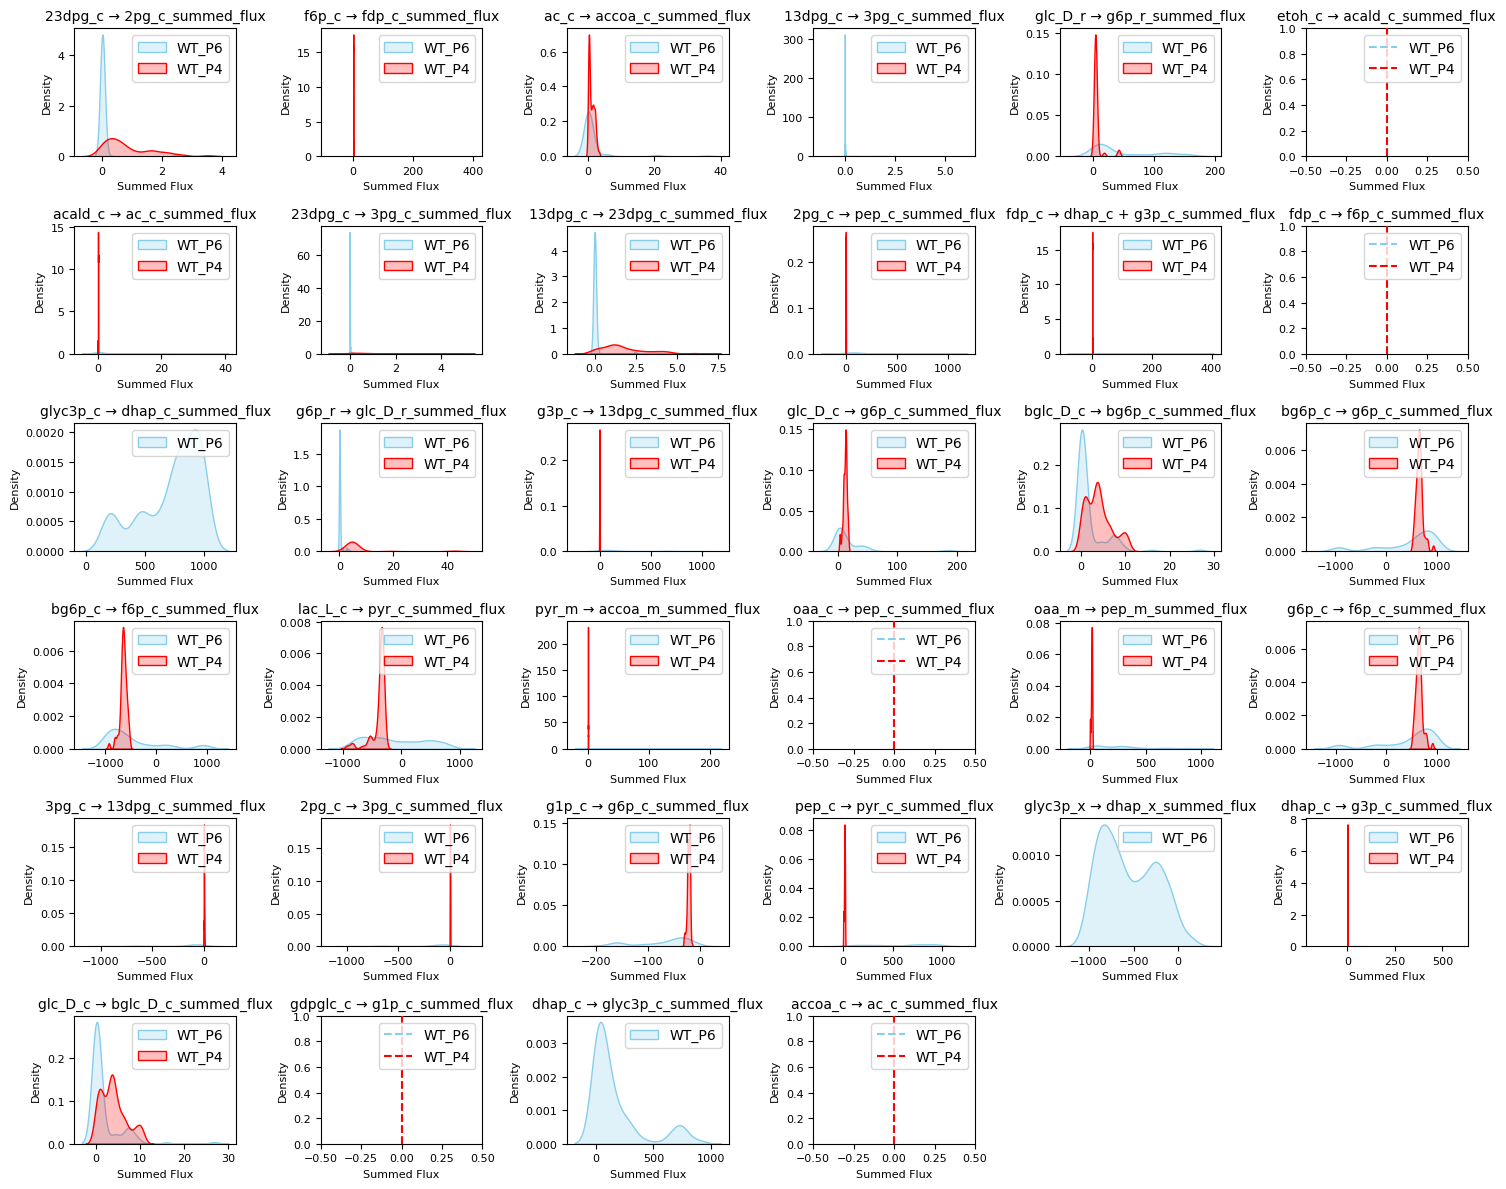

In [44]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved flux sampling data for WT_P6 and WT_P4
with open("../Analyses/growth_rate_pred/flux_sampling/Sampling_WT_P6_Bio142_600.pkl", "rb") as f:
    WT_P6_flux_sampling_df = pickle.load(f)

with open("../Analyses/growth_rate_pred/flux_sampling/Sampling_WT_P4_Bio142_600.pkl", "rb") as f:
    WT_P4_flux_sampling_df = pickle.load(f)

# Function to filter reactions to dictionary (same as before)
def filter_reactions_to_dict(model, reaction_list):
    reaction_dict = {}
    for rxn in model.reactions:
        rxn_reactants = [met.id for met in rxn.reactants]
        rxn_products = [met.id for met in rxn.products]

        for reaction_data in reaction_list:
            target_reactants = reaction_data["reactants"]
            target_products = reaction_data["products"]

            reactants_match = set(target_reactants).issubset(rxn_reactants)
            products_match = set(target_products).issubset(rxn_products)
            reverse_reactants_match = set(target_reactants).issubset(rxn_products)
            reverse_products_match = set(target_products).issubset(rxn_reactants)

            if reactants_match and products_match:
                key = f"{' + '.join(target_reactants)} → {' + '.join(target_products)}"
            elif reverse_reactants_match and reverse_products_match:
                key = f"{' + '.join(target_products)} → {' + '.join(target_reactants)}"
            else:
                continue

            if key not in reaction_dict:
                reaction_dict[key] = []
            if rxn.id not in reaction_dict[key]:
                reaction_dict[key].append(rxn.id)

    return reaction_dict

# Example usage: assuming `filtered_reaction_dict` is created from this function
filtered_reaction_dict = filter_reactions_to_dict(iCHO3K, reaction_list)

# Function to sum flux values based on filtered reaction dictionary
def sum_fluxes(flux_sampling_df, filtered_reaction_dict):
    summed_flux_df = pd.DataFrame(index=flux_sampling_df.index)
    
    for reactant, reactions in filtered_reaction_dict.items():
        total_flux = pd.Series(0, index=flux_sampling_df.index)  # Initialize total flux with zeros for all rows

        for reaction in reactions:
            if reaction in flux_sampling_df.columns:
                total_flux += flux_sampling_df[reaction]
            else:
                print(f"Warning: Reaction {reaction} not found in the flux sampling data.")

        column_name = f"{reactant}_summed_flux"
        summed_flux_df[column_name] = total_flux

    return summed_flux_df

# Sum fluxes for both WT_P6 and WT_P4 datasets
WT_P6_summed_flux_df = sum_fluxes(WT_P6_flux_sampling_df, filtered_reaction_dict)
WT_P4_summed_flux_df = sum_fluxes(WT_P4_flux_sampling_df, filtered_reaction_dict)

# Plotting the results side by side with different colors for comparison
num_columns = len(WT_P6_summed_flux_df.columns)
nrows = 6
ncols = 6
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(WT_P6_summed_flux_df.columns):
    ax = axes[i]

    if WT_P6_summed_flux_df[column].var() == 0 and WT_P4_summed_flux_df[column].var() == 0:
        constant_value_p6 = WT_P6_summed_flux_df[column].iloc[0]
        constant_value_p4 = WT_P4_summed_flux_df[column].iloc[0]
        
        # Set x-axis limits around the constant value to center the dashed line
        ax.set_xlim(constant_value_p6 - 0.5, constant_value_p6 + 0.5)

        ax.axvline(constant_value_p6, color='skyblue', linestyle='--', label='WT_P6', zorder=3)
        ax.axvline(constant_value_p4, color='red', linestyle='--', label='WT_P4', zorder=4)
        ax.set_title(f'Constant values', fontsize=10)
    else:
        sns.kdeplot(WT_P6_summed_flux_df[column], ax=ax, color='skyblue', fill=True, label='WT_P6', zorder=1, warn_singular=False, common_norm=False)
        sns.kdeplot(WT_P4_summed_flux_df[column], ax=ax, color='red', fill=True, label='WT_P4', zorder=2, warn_singular=False, common_norm=False)

    ax.set_title(f'{column}', fontsize=10)
    ax.set_xlabel('Summed Flux', fontsize=8)
    ax.set_ylabel('Density', fontsize=8)
    ax.legend(loc='upper right')

    ax.tick_params(axis='both', labelsize=8)

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [47]:
# Load the essential genes data
exp_essential_genes = pd.read_csv('../Data/Gene_Essentiality/cho_essential_genes.csv', sep='\t')

# Clean up gene names by removing any '__1' suffixes
exp_essential_genes['gene'] = exp_essential_genes['gene'].str.replace('__1$', '', regex=True)

# Extract all gene names into a set to avoid duplicates
all_gene_names = set()
for names in exp_essential_genes['gene']:
    for name in names.split('|'):  # Extract the names of the genes with two aliases
        all_gene_names.add(name)


In [48]:
# Load the DataFrame from the pickle file
with open("gene_id_mapping.pkl", "rb") as f:
    df_loaded = pickle.load(f)

# Display the loaded DataFrame
print(df_loaded)

          gene entrez_gene_id
0          Ubc      100689267
1       Ncaph2      100756862
2        Huwe1      100757403
3      Isg20l2      100752909
4        Coq8b      100770066
...        ...            ...
1975     Sprtn      100764217
1976     Perm1      100773289
1977   Tmem147      100751744
1978    Rnf216      100758416
1979  Rnaseh2b      100751948

[1980 rows x 2 columns]


In [ ]:
# Load uptake and secretion rate "Intervals dict

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_wt_dict.pkl', 'rb') as file:
    uptsec_intrvl_wt = pickle.load(file)

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_zela_dict.pkl', 'rb') as file:
    uptsec_intrvl_zela = pickle.load(file)
    
temp_dict_zela = uptsec_intrvl_zela
temp_dict_wt = uptsec_intrvl_wt

In [43]:
"""
CHOOSE ONE!!!! (Recommended version of code)

"""

def constraint_model_feg(model, time, exp_dict, objective=None, solver=None, make_GM=None):
    """
    Constrain the model with experimental data and calculate the objective function value using pFBA.
    
    Parameters:
    - model: COBRA model to be constrained.
    - time: Time interval for applying the experimental constraints. Default is 'P2 to P4'.
    - objective: The objective reaction. Default is 'biomass_cho_s'.
    - solver: Solver to be used. Default is 'gurobi'.
    
    Returns:
    - pfba_obj: The optimized objective function value (growth rate or other objective).
    - pfba_solution: The full pFBA solution (flux distribution).
    """
    
    GM = model.copy()  # Copy the model to avoid modifying the original
    temp_dict = exp_dict
    
    # Default values if no argument is provided
    if objective is None:
        objective = 'biomass_cho_s'
    if solver is None:
        solver = 'gurobi'

    # Set the solver and the objective reaction
    GM.solver = solver
    GM.objective = objective

    # Constraint the model with experimental data
    if objective is None:
        GM.reactions.biomass_cho_s.bounds = temp_dict['exp_growth_rate'][time]
    
    for rxn in GM.boundary:
        # Models that are forced to secrete ethanol are not feasible
        if rxn.id == 'EX_etoh_e':
            rxn.bounds = (-0.1,0.1)
            continue

        # Replace the lower and upper bound with experimental data
        if rxn.id in temp_dict.keys():
            rxn.bounds = temp_dict[rxn.id][time]
            continue

        # Keep boundaries open for essential metabolites
        if rxn.id == 'EX_h2o_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_h_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_o2_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_hco3_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_so4_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_pi_e':
            rxn.bounds = (-1000,1000)
            continue

        # Boundaries from Sink reactions on iCHO_v1
        if rxn.id == 'SK_Asn_X_Ser_Thr_r':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_Tyr_ggn_c':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_Ser_Thr_g':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_pre_prot_r':
            rxn.bounds = (-0.1,1000)
            continue

        # Close uptake rates for the rest of the boundaries
        if rxn.id.startswith("EX_"):
            rxn.bounds = (0,1000) 
        if rxn.id.startswith("SK_"):
            rxn.bounds = (0,1000)
        if rxn.id.startswith("DM_"):
            rxn.bounds = (0,1000)
    
    if make_GM == True:
        for rxn in GM.boundary:
            if rxn.id in temp_dict.keys():
                rxn.bounds = (-1000,1000)
                continue
        pfba_solution_GM = cobra.flux_analysis.pfba(GM)
        pfba_obj_GM = pfba_solution_GM.fluxes[objective]        
            
            
    model_exp_constrained = GM    
    # Perform pFBA (parsimonious FBA) to minimize the total flux
    pfba_solution = cobra.flux_analysis.pfba(GM)
    pfba_obj = pfba_solution.fluxes[objective]

    # Print and return the objective value and the full pFBA solution
    print(f"Optimized objective (growth rate): {pfba_obj}")
    
    # Return the objective value and the full pFBA solution
    return model_exp_constrained, pfba_obj, pfba_solution, pfba_obj_GM, GM

In [34]:
"""
CHOOSE ONE!!!!

"""

def constraint_model_feg(model, time, exp_dict, objective=None, solver=None):
    """
    Constrain the model with experimental data and calculate the objective function value using pFBA.
    
    Parameters:
    - model: COBRA model to be constrained.
    - time: Time interval for applying the experimental constraints. Default is 'P2 to P4'.
    - objective: The objective reaction. Default is 'biomass_cho_s'.
    - solver: Solver to be used. Default is 'gurobi'.
    
    Returns:
    - pfba_obj: The optimized objective function value (growth rate or other objective).
    - pfba_solution: The full pFBA solution (flux distribution).
    """
    
    GM = model.copy()  # Copy the model to avoid modifying the original
    temp_dict = exp_dict
    
    # Default values if no argument is provided
    if objective is None:
        objective = 'biomass_cho_s'
    if solver is None:
        solver = 'gurobi'

    # Set the solver and the objective reaction
    GM.solver = solver
    GM.objective = objective

    # Constraint the model with experimental data
    if objective is None:
        GM.reactions.biomass_cho_s.bounds = temp_dict['exp_growth_rate'][time]
    
    for rxn in GM.boundary:
        # Models that are forced to secrete ethanol are not feasible
        if rxn.id == 'EX_etoh_e':
            rxn.bounds = (-0.1,0.1)
            continue

        # Replace the lower and upper bound with experimental data
        if rxn.id in temp_dict.keys():
            rxn.bounds = temp_dict[rxn.id][time]
            continue

        # Keep boundaries open for essential metabolites
        if rxn.id == 'EX_h2o_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_h_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_o2_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_hco3_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_so4_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_pi_e':
            rxn.bounds = (-1000,1000)
            continue

        # Boundaries from Sink reactions on iCHO_v1
        if rxn.id == 'SK_Asn_X_Ser_Thr_r':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_Tyr_ggn_c':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_Ser_Thr_g':
            rxn.bounds = (-0.1,1000)
            continue
        if rxn.id == 'SK_pre_prot_r':
            rxn.bounds = (-0.1,1000)
            continue

        # Close uptake rates for the rest of the boundaries
        if rxn.id.startswith("EX_"):
            rxn.bounds = (0,1000) 
        if rxn.id.startswith("SK_"):
            rxn.bounds = (0,1000)
        if rxn.id.startswith("DM_"):
            rxn.bounds = (0,1000)
    
#     if make_GM == True:
#         for rxn in GM.boundary:
#             if rxn.id in temp_dict.keys():
#                 rxn.bounds = (-1000,1000)
#                 continue
# #         pfba_solution_GM = cobra.flux_analysis.pfba(GM)
# #         pfba_obj_GM = pfba_solution_GM.fluxes[objective]        
            
            
    model_exp_constrained = GM   
    # Perform pFBA (parsimonious FBA) to minimize the total flux
    pfba_solution = cobra.flux_analysis.pfba(GM)
    pfba_obj = pfba_solution.fluxes[objective]

    # Print and return the objective value and the full pFBA solution
    print(f"Optimized objective (growth rate): {pfba_obj}")
    
    # Return the objective value and the full pFBA solution
    return model_exp_constrained, pfba_obj, pfba_solution

In [50]:
"""
CHOOSE ONE!!!!(Recommended)

"""

def find_and_match_essential_genes(model, df_exp_essential, save_csv=True, print_df=False, model_GM = None):
    """
    This function finds and matches essential genes in the model with experimental Entrez gene data.
    It returns the number of total matched genes (len_mat) and the number of essential matched genes (len_mat_ess).
    """

    # Check if the necessary columns 'entrez_gene_id' and 'gene' exist in the dataframe
    required_columns = ['entrez_gene_id', 'gene']
    for col in required_columns:
        if col not in df_exp_essential.columns:
            raise KeyError(f"Column '{col}' is missing from the dataframe.")

    # Create a reverse lookup dictionary where the key is the Entrez Gene ID and the value is the gene symbol
    entrez_dict = df_exp_essential.set_index('entrez_gene_id')['gene'].to_dict()

    # Matching metabolic genes
    tmp_gene = []    
    for gene in model.genes:
        # Check if the gene.id matches any Entrez Gene ID in the reverse dictionary
        if gene.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene.id]
            tmp_gene.append((gene.id, gene.name, entrez_gene_symbol))
    
    # Number of total matched genes
    len_mat = len(tmp_gene)

    # Find the essential genes for the given model
    essential_genes = find_essential_genes(model)
    
    # Create a list to store the matched essential genes
    matched_genes = []

    # Iterate over the essential genes and check if they match with the Entrez Gene IDs
    for gene in essential_genes:
        gene_exp_ess = model.genes.get_by_id(gene.id)  # Get the gene from the model

        if gene_exp_ess.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene_exp_ess.id]
            matched_genes.append((gene_exp_ess.id, gene_exp_ess.name, entrez_gene_symbol))

    # Convert the matched essential genes into a DataFrame
    matched_genes_essential_df = pd.DataFrame(matched_genes, columns=['gene_exp_ess.id', 'gene_exp_ess.name', 'entrez_gene_symbol'])

    # Save the result to a CSV file if save_csv is True
    if save_csv:
        matched_genes_essential_df.to_csv("matched_gene_entrez_ids_feg.csv", index=False)

    # Print the DataFrame if print_df is True
    if print_df:
        print(matched_genes_essential_df)

    # Number of essential matched genes
    len_mat_ess = len(matched_genes_essential_df)
    
    if model_GM is None:
        # Print the summary information
        print(f"Total matched metabolic genes: {len_mat}")
        print(f"Matched essential genes: {len_mat_ess}/{len_mat}")
    else: 
        
        essential_genes = find_essential_genes(model_GM)

        # Create a list to store the matched essential genes
        matched_genes_GM = []

        # Iterate over the essential genes and check if they match with the Entrez Gene IDs
        for gene in essential_genes:
            gene_exp_ess_GM = model_GM.genes.get_by_id(gene.id)  # Get the gene from the model

            if gene_exp_ess_GM.id in entrez_dict:
                entrez_gene_symbol = entrez_dict[gene_exp_ess_GM.id]
                matched_genes_GM.append((gene_exp_ess_GM.id, gene_exp_ess_GM.name, entrez_gene_symbol))

        # Convert the matched essential genes into a DataFrame
        matched_genes_essential_GM_df = pd.DataFrame(matched_genes_GM, columns=['gene_exp_ess_GM.id', 'gene_exp_ess_GM.name', 'entrez_gene_symbol'])
        len_mat_GM_ess = len(matched_genes_essential_GM_df)
        # Print the summary information
        print(f"Total matched metabolic genes_GM: {len_mat}")
        print(f"Matched essential genes_GM: {len_mat_GM_ess}/{len_mat}")



    # Return the matched DataFrame and gene counts
    return matched_genes_essential_df, len_mat, len_mat_ess, len_mat_GM_ess


In [30]:
"""
CHOOSE ONE!!!!

"""

def find_and_match_essential_genes(model, df_exp_essential, save_csv=True, print_df=False):
    """
    This function finds and matches essential genes in the model with experimental Entrez gene data.
    It returns the number of total matched genes (len_mat) and the number of essential matched genes (len_mat_ess).
    """

    # Check if the necessary columns 'entrez_gene_id' and 'gene' exist in the dataframe
    required_columns = ['entrez_gene_id', 'gene']
    for col in required_columns:
        if col not in df_exp_essential.columns:
            raise KeyError(f"Column '{col}' is missing from the dataframe.")

    # Create a reverse lookup dictionary where the key is the Entrez Gene ID and the value is the gene symbol
    entrez_dict = df_exp_essential.set_index('entrez_gene_id')['gene'].to_dict()

    # Matching metabolic genes
    tmp_gene = []    
    for gene in model.genes:
        # Check if the gene.id matches any Entrez Gene ID in the reverse dictionary
        if gene.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene.id]
            tmp_gene.append((gene.id, gene.name, entrez_gene_symbol))
    
    # Number of total matched genes
    len_mat = len(tmp_gene)

    # Find the essential genes for the given model
    essential_genes = find_essential_genes(model)
    
    # Create a list to store the matched essential genes
    matched_genes = []

    # Iterate over the essential genes and check if they match with the Entrez Gene IDs
    for gene in essential_genes:
        gene_exp_ess = model.genes.get_by_id(gene.id)  # Get the gene from the model

        if gene_exp_ess.id in entrez_dict:
            entrez_gene_symbol = entrez_dict[gene_exp_ess.id]
            matched_genes.append((gene_exp_ess.id, gene_exp_ess.name, entrez_gene_symbol))

    # Convert the matched essential genes into a DataFrame
    matched_genes_essential_df = pd.DataFrame(matched_genes, columns=['gene_exp_ess.id', 'gene_exp_ess.name', 'entrez_gene_symbol'])

    # Save the result to a CSV file if save_csv is True
    if save_csv:
        matched_genes_essential_df.to_csv("matched_gene_entrez_ids_feg.csv", index=False)

    # Print the DataFrame if print_df is True
    if print_df:
        print(matched_genes_essential_df)

    # Number of essential matched genes
    len_mat_ess = len(matched_genes_essential_df)
    
#     if model_GM is None:
        
        
        
    # Print the summary information
    print(f"Total matched metabolic genes: {len_mat}")
    print(f"Matched essential genes: {len_mat_ess}/{len_mat}")

    # Return the matched DataFrame and gene counts
    return matched_genes_essential_df, len_mat, len_mat_ess


In [25]:
def update_reaction_ids_specific(model):
    # Iterate over each reaction in the model
    for rxn in model.reactions:
        # Check if the reaction ID contains "(e)"
        if "(e)" in rxn.id:
            # Replace "(e)" with "_e"
            new_id = rxn.id.replace("(e)", "_e")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(c)" in rxn.id:
            new_id = rxn.id.replace("(c)", "_c")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(x)" in rxn.id:
            new_id = rxn.id.replace("(x)", "_x")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(r)" in rxn.id:
            new_id = rxn.id.replace("(r)", "_r")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "(g)" in rxn.id:
            new_id = rxn.id.replace("(g)", "_g")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_e_" in rxn.id:
            # Replace "(e)" with "_e"
            new_id = rxn.id.replace("_e_", "_e")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_c_" in rxn.id:
            # Replace "_c_" with "_c"
            new_id = rxn.id.replace("_c_", "_c")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_x_" in rxn.id:
            new_id = rxn.id.replace("_x_", "_x")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_r_" in rxn.id:
            new_id = rxn.id.replace("_r_", "_r")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
        
        if "_g_" in rxn.id:
            new_id = rxn.id.replace("_g_", "_g")
            print(f"Updating reaction ID: {rxn.id} -> {new_id}")
            # Update the reaction ID with the new one
            rxn.id = new_id
            continue
    return model

In [26]:
iCHO2291_changed = update_reaction_ids_specific(iCHO2291)
iCHO1766_changed = update_reaction_ids_specific(iCHO1766)
iCHO2101_changed = update_reaction_ids_specific(iCHO2101)

Updating reaction ID: EX_10fthf(e) -> EX_10fthf_e
Updating reaction ID: EX_10fthf5glu(e) -> EX_10fthf5glu_e
Updating reaction ID: EX_10fthf6glu(e) -> EX_10fthf6glu_e
Updating reaction ID: EX_10fthf7glu(e) -> EX_10fthf7glu_e
Updating reaction ID: EX_11_cis_retfa(e) -> EX_11_cis_retfa_e
Updating reaction ID: EX_13_cis_retnglc(e) -> EX_13_cis_retnglc_e
Updating reaction ID: EX_1glyc_cho(e) -> EX_1glyc_cho_e
Updating reaction ID: EX_1mncam(e) -> EX_1mncam_e
Updating reaction ID: EX_23cump(e) -> EX_23cump_e
Updating reaction ID: EX_2425dhvitd2(e) -> EX_2425dhvitd2_e
Updating reaction ID: EX_2425dhvitd3(e) -> EX_2425dhvitd3_e
Updating reaction ID: EX_24nph(e) -> EX_24nph_e
Updating reaction ID: EX_25hvitd2(e) -> EX_25hvitd2_e
Updating reaction ID: EX_25hvitd3(e) -> EX_25hvitd3_e
Updating reaction ID: EX_2hb(e) -> EX_2hb_e
Updating reaction ID: EX_2mcit(e) -> EX_2mcit_e
Updating reaction ID: EX_34dhoxpeg(e) -> EX_34dhoxpeg_e
Updating reaction ID: EX_34dhphe(e) -> EX_34dhphe_e
Updating reactio

Updating reaction ID: EX_dhf(e) -> EX_dhf_e
Updating reaction ID: EX_digalsgalside_cho(e) -> EX_digalsgalside_cho_e
Updating reaction ID: EX_din(e) -> EX_din_e
Updating reaction ID: EX_dlnlcg(e) -> EX_dlnlcg_e
Updating reaction ID: EX_dmantipyrine(e) -> EX_dmantipyrine_e
Updating reaction ID: EX_dmhptcrn(e) -> EX_dmhptcrn_e
Updating reaction ID: EX_dopa(e) -> EX_dopa_e
Updating reaction ID: EX_dopasf(e) -> EX_dopasf_e
Updating reaction ID: EX_drib(e) -> EX_drib_e
Updating reaction ID: EX_dtdp(e) -> EX_dtdp_e
Updating reaction ID: EX_dtmp(e) -> EX_dtmp_e
Updating reaction ID: EX_dttp(e) -> EX_dttp_e
Updating reaction ID: EX_duri(e) -> EX_duri_e
Updating reaction ID: EX_eaflatoxin(e) -> EX_eaflatoxin_e
Updating reaction ID: EX_ebastine(e) -> EX_ebastine_e
Updating reaction ID: EX_ebastineoh(e) -> EX_ebastineoh_e
Updating reaction ID: EX_eicostet(e) -> EX_eicostet_e
Updating reaction ID: EX_elaid(e) -> EX_elaid_e
Updating reaction ID: EX_estradiol(e) -> EX_estradiol_e
Updating reaction ID

Updating reaction ID: EX_lpchol_cho(e) -> EX_lpchol_cho_e
Updating reaction ID: EX_lys_L(e) -> EX_lys_L_e
Updating reaction ID: EX_mag_cho(e) -> EX_mag_cho_e
Updating reaction ID: EX_mal_L(e) -> EX_mal_L_e
Updating reaction ID: EX_malt(e) -> EX_malt_e
Updating reaction ID: EX_malttr(e) -> EX_malttr_e
Updating reaction ID: EX_man(e) -> EX_man_e
Updating reaction ID: EX_meoh(e) -> EX_meoh_e
Updating reaction ID: EX_mepi(e) -> EX_mepi_e
Updating reaction ID: EX_mercplaccys(e) -> EX_mercplaccys_e
Updating reaction ID: EX_met_L(e) -> EX_met_L_e
Updating reaction ID: EX_mthgxl(e) -> EX_mthgxl_e
Updating reaction ID: EX_n2m2nmasn(e) -> EX_n2m2nmasn_e
Updating reaction ID: EX_na1(e) -> EX_na1_e
Updating reaction ID: EX_nac(e) -> EX_nac_e
Updating reaction ID: EX_nad(e) -> EX_nad_e
Updating reaction ID: EX_nadp(e) -> EX_nadp_e
Updating reaction ID: EX_ncam(e) -> EX_ncam_e
Updating reaction ID: EX_nh4(e) -> EX_nh4_e
Updating reaction ID: EX_nifedipine(e) -> EX_nifedipine_e
Updating reaction ID: 

Updating reaction ID: EX_gncore1(e) -> EX_gncore1_e
Updating reaction ID: EX_ind3ac(e) -> EX_ind3ac_e
Updating reaction ID: EX_12HPET(e) -> EX_12HPET_e
Updating reaction ID: EX_15HPET(e) -> EX_15HPET_e
Updating reaction ID: EX_arg_D(e) -> EX_arg_D_e
Updating reaction ID: DM_oak2g_hs(c) -> DM_oak2g_hs_c
Updating reaction ID: EX_mg2(e) -> EX_mg2_e
Updating reaction ID: EX_cu2(e) -> EX_cu2_e
Updating reaction ID: EX_eicostri(e) -> EX_eicostri_e
Updating reaction ID: EX_docastri(e) -> EX_docastri_e
Updating reaction ID: EX_Rtotal(e) -> EX_Rtotal_e
Updating reaction ID: EX_Rtotal2(e) -> EX_Rtotal2_e
Updating reaction ID: EX_Rtotal3(e) -> EX_Rtotal3_e
Updating reaction ID: EX_HC01610_e_ -> EX_HC01610_e
Updating reaction ID: EX_HC02179_e_ -> EX_HC02179_e
Updating reaction ID: EX_C05965_e_ -> EX_C05965_e
Updating reaction ID: EX_HC02176_e_ -> EX_HC02176_e
Updating reaction ID: EX_10fthf_e_ -> EX_10fthf_e
Updating reaction ID: EX_10fthf5glu_e_ -> EX_10fthf5glu_e
Updating reaction ID: EX_10fthf6

Updating reaction ID: EX_CE5786_e_ -> EX_CE5786_e
Updating reaction ID: EX_CE5788_e_ -> EX_CE5788_e
Updating reaction ID: EX_CE5789_e_ -> EX_CE5789_e
Updating reaction ID: EX_CE5797_e_ -> EX_CE5797_e
Updating reaction ID: EX_CE5798_e_ -> EX_CE5798_e
Updating reaction ID: EX_CE5853_e_ -> EX_CE5853_e
Updating reaction ID: EX_CE5854_e_ -> EX_CE5854_e
Updating reaction ID: EX_CE5867_e_ -> EX_CE5867_e
Updating reaction ID: EX_CE5868_e_ -> EX_CE5868_e
Updating reaction ID: EX_CE5869_e_ -> EX_CE5869_e
Updating reaction ID: EX_cgly_e_ -> EX_cgly_e
Updating reaction ID: EX_chol_e_ -> EX_chol_e
Updating reaction ID: EX_cholate_e_ -> EX_cholate_e
Updating reaction ID: EX_chsterol_e_ -> EX_chsterol_e
Updating reaction ID: EX_chtn_e_ -> EX_chtn_e
Updating reaction ID: EX_cit_e_ -> EX_cit_e
Updating reaction ID: EX_citr_L_e_ -> EX_citr_L_e
Updating reaction ID: EX_cl_e_ -> EX_cl_e
Updating reaction ID: EX_CLPND_e_ -> EX_CLPND_e
Updating reaction ID: EX_cmp_e_ -> EX_cmp_e
Updating reaction ID: EX_co_

Updating reaction ID: EX_h2o2_e_ -> EX_h2o2_e
Updating reaction ID: EX_ha_e_ -> EX_ha_e
Updating reaction ID: EX_ha_pre1_e_ -> EX_ha_pre1_e
Updating reaction ID: EX_HC00004_e_ -> EX_HC00004_e
Updating reaction ID: EX_HC00229_e_ -> EX_HC00229_e
Updating reaction ID: EX_HC00250_e_ -> EX_HC00250_e
Updating reaction ID: EX_HC00822_e_ -> EX_HC00822_e
Updating reaction ID: EX_HC00955_e_ -> EX_HC00955_e
Updating reaction ID: EX_HC01104_e_ -> EX_HC01104_e
Updating reaction ID: EX_HC01361_e_ -> EX_HC01361_e
Updating reaction ID: EX_HC01440_e_ -> EX_HC01440_e
Updating reaction ID: EX_HC01441_e_ -> EX_HC01441_e
Updating reaction ID: EX_HC01444_e_ -> EX_HC01444_e
Updating reaction ID: EX_HC01446_e_ -> EX_HC01446_e
Updating reaction ID: EX_HC01577_e_ -> EX_HC01577_e
Updating reaction ID: EX_HC01609_e_ -> EX_HC01609_e
Updating reaction ID: EX_HC01700_e_ -> EX_HC01700_e
Updating reaction ID: EX_HC01787_e_ -> EX_HC01787_e
Updating reaction ID: EX_HC02154_e_ -> EX_HC02154_e
Updating reaction ID: EX_HC0

Updating reaction ID: EX_ps_cho_e_ -> EX_ps_cho_e
Updating reaction ID: EX_psyl_e_ -> EX_psyl_e
Updating reaction ID: EX_psylchol_e_ -> EX_psylchol_e
Updating reaction ID: EX_psyltchol_e_ -> EX_psyltchol_e
Updating reaction ID: EX_psyltdechol_e_ -> EX_psyltdechol_e
Updating reaction ID: EX_ptdca_e_ -> EX_ptdca_e
Updating reaction ID: EX_ptrc_e_ -> EX_ptrc_e
Updating reaction ID: EX_ptth_e_ -> EX_ptth_e
Updating reaction ID: EX_pydam_e_ -> EX_pydam_e
Updating reaction ID: EX_pydx_e_ -> EX_pydx_e
Updating reaction ID: EX_pydx5p_e_ -> EX_pydx5p_e
Updating reaction ID: EX_pydxn_e_ -> EX_pydxn_e
Updating reaction ID: EX_pyr_e_ -> EX_pyr_e
Updating reaction ID: EX_q10_e_ -> EX_q10_e
Updating reaction ID: EX_q10h2_e_ -> EX_q10h2_e
Updating reaction ID: EX_rbt_e_ -> EX_rbt_e
Updating reaction ID: EX_retfa_e_ -> EX_retfa_e
Updating reaction ID: EX_retinol_9_cis_e_ -> EX_retinol_9_cis_e
Updating reaction ID: EX_retinol_cis_11_e_ -> EX_retinol_cis_11_e
Updating reaction ID: EX_retinol_e_ -> EX_re

Updating reaction ID: EX_5thf_e_ -> EX_5thf_e
Updating reaction ID: EX_6dhf_e_ -> EX_6dhf_e
Updating reaction ID: EX_6htststerone_e_ -> EX_6htststerone_e
Updating reaction ID: EX_6thf_e_ -> EX_6thf_e
Updating reaction ID: EX_7dhf_e_ -> EX_7dhf_e
Updating reaction ID: EX_7thf_e_ -> EX_7thf_e
Updating reaction ID: EX_9_cis_retfa_e_ -> EX_9_cis_retfa_e
Updating reaction ID: EX_abt_e_ -> EX_abt_e
Updating reaction ID: EX_ac_e_ -> EX_ac_e
Updating reaction ID: EX_acac_e_ -> EX_acac_e
Updating reaction ID: EX_acald_e_ -> EX_acald_e
Updating reaction ID: EX_acetone_e_ -> EX_acetone_e
Updating reaction ID: EX_acgalfucgalacgalfuc12gal14acglcgalgluside_cho_e_ -> EX_acgalfucgalacgalfuc12gal14acglcgalgluside_cho_e
Updating reaction ID: EX_acgalfucgalacgalfucgalacglcgal14acglcgalgluside_cho_e_ -> EX_acgalfucgalacgalfucgalacglcgal14acglcgalgluside_cho_e
Updating reaction ID: EX_acgam_e_ -> EX_acgam_e
Updating reaction ID: EX_ach_e_ -> EX_ach_e
Updating reaction ID: EX_acmana_e_ -> EX_acmana_e
Updati

Updating reaction ID: EX_dlnlcg_e_ -> EX_dlnlcg_e
Updating reaction ID: EX_dmantipyrine_e_ -> EX_dmantipyrine_e
Updating reaction ID: EX_dmhptcrn_e_ -> EX_dmhptcrn_e
Updating reaction ID: EX_dopa_e_ -> EX_dopa_e
Updating reaction ID: EX_dopasf_e_ -> EX_dopasf_e
Updating reaction ID: EX_dpcoa_e_ -> EX_dpcoa_e
Updating reaction ID: EX_drib_e_ -> EX_drib_e
Updating reaction ID: EX_dtdp_e_ -> EX_dtdp_e
Updating reaction ID: EX_dtmp_e_ -> EX_dtmp_e
Updating reaction ID: EX_dttp_e_ -> EX_dttp_e
Updating reaction ID: EX_duri_e_ -> EX_duri_e
Updating reaction ID: EX_eaflatoxin_e_ -> EX_eaflatoxin_e
Updating reaction ID: EX_ebastine_e_ -> EX_ebastine_e
Updating reaction ID: EX_ebastineoh_e_ -> EX_ebastineoh_e
Updating reaction ID: EX_eicostet_e_ -> EX_eicostet_e
Updating reaction ID: EX_elaid_e_ -> EX_elaid_e
Updating reaction ID: EX_estradiol_e_ -> EX_estradiol_e
Updating reaction ID: EX_estradiolglc_e_ -> EX_estradiolglc_e
Updating reaction ID: EX_estriolglc_e_ -> EX_estriolglc_e
Updating rea

Updating reaction ID: EX_htaxol_e_ -> EX_htaxol_e
Updating reaction ID: EX_hxan_e_ -> EX_hxan_e
Updating reaction ID: EX_hyptaur_e_ -> EX_hyptaur_e
Updating reaction ID: EX_i_e_ -> EX_i_e
Updating reaction ID: EX_idour_e_ -> EX_idour_e
Updating reaction ID: EX_idp_e_ -> EX_idp_e
Updating reaction ID: EX_ile_L_e_ -> EX_ile_L_e
Updating reaction ID: EX_imp_e_ -> EX_imp_e
Updating reaction ID: EX_inost_e_ -> EX_inost_e
Updating reaction ID: EX_ins_e_ -> EX_ins_e
Updating reaction ID: EX_k_e_ -> EX_k_e
Updating reaction ID: EX_ksi_deg1_e_ -> EX_ksi_deg1_e
Updating reaction ID: EX_ksi_e_ -> EX_ksi_e
Updating reaction ID: EX_ksii_core2_e_ -> EX_ksii_core2_e
Updating reaction ID: EX_ksii_core4_e_ -> EX_ksii_core4_e
Updating reaction ID: EX_lac_D_e_ -> EX_lac_D_e
Updating reaction ID: EX_lac_L_e_ -> EX_lac_L_e
Updating reaction ID: EX_lcts_e_ -> EX_lcts_e
Updating reaction ID: EX_Lcystin_e_ -> EX_Lcystin_e
Updating reaction ID: EX_leu_L_e_ -> EX_leu_L_e
Updating reaction ID: EX_leugly_e_ -> EX

Updating reaction ID: EX_tettet6_e_ -> EX_tettet6_e
Updating reaction ID: EX_thf_e_ -> EX_thf_e
Updating reaction ID: EX_thm_e_ -> EX_thm_e
Updating reaction ID: EX_thmmp_e_ -> EX_thmmp_e
Updating reaction ID: EX_thmtp_e_ -> EX_thmtp_e
Updating reaction ID: EX_thr_L_e_ -> EX_thr_L_e
Updating reaction ID: EX_thym_e_ -> EX_thym_e
Updating reaction ID: EX_thymd_e_ -> EX_thymd_e
Updating reaction ID: EX_thyox_L_e_ -> EX_thyox_L_e
Updating reaction ID: EX_tmndnc_e_ -> EX_tmndnc_e
Updating reaction ID: EX_tolbutamide_e_ -> EX_tolbutamide_e
Updating reaction ID: EX_tre_e_ -> EX_tre_e
Updating reaction ID: EX_triodthy_e_ -> EX_triodthy_e
Updating reaction ID: EX_triodthysuf_e_ -> EX_triodthysuf_e
Updating reaction ID: EX_trp_L_e_ -> EX_trp_L_e
Updating reaction ID: EX_tststerone_e_ -> EX_tststerone_e
Updating reaction ID: EX_tststeroneglc_e_ -> EX_tststeroneglc_e
Updating reaction ID: EX_tststerones_e_ -> EX_tststerones_e
Updating reaction ID: EX_tsul_e_ -> EX_tsul_e
Updating reaction ID: EX_t

In [52]:
for reaction in iCHO2101_changed.reactions:
    if "_e"in reaction.id:
        print(f"Reaction ID: {reaction.id}, Reaction Name: {reaction.name}")

Reaction ID: 3KLGALHGm_e, Reaction Name: 3-Ketolactose galactohydrolase Galactose metabolism EC:3.2.1.23
Reaction ID: OXYODPCm_e, Reaction Name: Fe(II):oxygen oxidoreductase Porphyrin and chlorophyll metabolism EC:1.16.3.1
Reaction ID: EX_HC01610_e, Reaction Name: Exchange of CoproporphyrinogenI
Reaction ID: URPHYRCLPCm_e, Reaction Name: Uroporphyrinogen I carboxy-lyase Porphyrin and chlorophyll metabolism EC:4.1.1.37
Reaction ID: EX_HC02179_e, Reaction Name: 20-hydroxy-arachidonate exchange
Reaction ID: EX_C05965_e, Reaction Name: 12(S)-HPETE(1-) exchange
Reaction ID: EX_HC02176_e, Reaction Name: laurate exchange
Reaction ID: DOLGPP_er, Reaction Name: Dolichyl-beta-D-glucosyl-phosphate dolichylphosphohydrolase (uterus)
Reaction ID: DOLPH_er, Reaction Name: Dolichol-phosphate phosphohydrolase, human (uterus)
Reaction ID: DOLPMT2_er, Reaction Name: dolichyl-phosphate-mannose-glycolipid alpha-mannosyltransferase (uterus)
Reaction ID: DOLPMT4_er, Reaction Name: dolichyl-phosphate-mannose-

In [35]:
model = load_json_model('iCHO3595_unblocked.json')
GM_constrained, _, _ = constraint_model_feg(model, time='P2 to P4', exp_dict=temp_dict_zela)
matched_df,len_3k,len_3k_ess = find_and_match_essential_genes(GM_constrained, df_loaded, save_csv=False, print_df=True, )

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpkkuukbas.lp
Reading time = 0.05 seconds
: 4764 rows, 17114 columns, 72396 nonzeros
Optimized objective (growth rate): 0.08204526758059716
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpu2i17l35.lp
Reading time = 0.06 seconds
: 4764 rows, 17114 columns, 72396 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp3ezb6hry.lp
Reading time = 0.06 seconds
: 4764 rows, 17114 columns, 72396 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpnyjtrs6x.lp
Reading time = 0.07 seconds
: 4764 rows, 17114 columns, 72396 nonzeros
Set para

In [47]:
model = load_json_model('iCHO3595_unblocked.json')
GM_constrained, _, _, _, GM_unconstrained = constraint_model_feg(model, time='P2 to P4', exp_dict=temp_dict_zela, make_GM = True)
matched_df,len_3k,len_3k_ess, len_3k_ess_GM = find_and_match_essential_genes(GM_constrained, df_loaded, save_csv=False, print_df=True, model_GM=GM_unconstrained)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp6h98g4d2.lp
Reading time = 0.05 seconds
: 4764 rows, 17114 columns, 72396 nonzeros
Optimized objective (growth rate): 215.53766987183332
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpp9_zvm0v.lp
Reading time = 0.06 seconds
: 4764 rows, 17114 columns, 72396 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp39b0g_q4.lp
Reading time = 0.06 seconds
: 4764 rows, 17114 columns, 72396 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp2euazrii.lp
Reading time = 0.11 seconds
: 4764 rows, 17114 columns, 72396 nonzeros
Set param

ValueError: too many values to unpack (expected 3)

In [36]:
GM_constrained_1766, _, _ = constraint_model_feg(iCHO1766_changed, time='P2 to P4', exp_dict=temp_dict_zela, objective = "biomass_cho")
matched_df_1766, len_1766, len_1766_ess = find_and_match_essential_genes(GM_constrained_1766, df_loaded, save_csv=False, print_df=True)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmprlihb5nh.lp
Reading time = 0.04 seconds
: 4456 rows, 13326 columns, 55296 nonzeros
Optimized objective (growth rate): 0.07008336960609673
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpenn264wd.lp
Reading time = 0.04 seconds
: 4456 rows, 13326 columns, 55296 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp0ghx2zrz.lp
Reading time = 0.05 seconds
: 4456 rows, 13326 columns, 55296 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpjuhc3mj1.lp
Reading time = 0.05 seconds
: 4456 rows, 13326 columns, 55296 nonzeros
Set para

In [37]:
GM_constrained_2101, _, _ = constraint_model_feg(iCHO2101_changed, time='P2 to P4', exp_dict=temp_dict_zela, objective = "biomass_cho")
matched_df_2101, len_2101, len_2101_ess = find_and_match_essential_genes(GM_constrained_2101, df_loaded, save_csv=False, print_df=True)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmplp0e500b.lp
Reading time = 0.04 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Optimized objective (growth rate): 0.0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpzwzhfl61.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpa6vg7225.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpdg3m7d70.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
A

In [51]:
GM_constrained_2101, _, _, _, GM_unconstrained_2101 = constraint_model_feg(iCHO2101_changed, time='P2 to P4', exp_dict=temp_dict_zela, make_GM = True, objective = "biomass_cho")
matched_df_2101,len_2101,len_2101_ess, len_2101_ess_GM = find_and_match_essential_genes(GM_constrained_2101, df_loaded, save_csv=False, print_df=True, model_GM=GM_unconstrained_2101)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpo39adjx_.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Optimized objective (growth rate): 0.0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp2e9mqq8a.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpiibytreg.lp
Reading time = 0.05 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmprlxv4jm4.lp
Reading time = 0.08 seconds
: 4527 rows, 14872 columns, 58208 nonzeros
Set parameter Username
A

In [38]:
GM_constrained_2291, _, _ = constraint_model_feg(iCHO2291_changed, time='P2 to P4', exp_dict=temp_dict_zela, objective = "biomass_cho")
matched_df_2291, len_2291, len_2291_ess = find_and_match_essential_genes(GM_constrained_2291, df_loaded, save_csv=False, print_df=True)

Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpm054x9su.lp
Reading time = 0.04 seconds
: 3972 rows, 12472 columns, 49472 nonzeros
Optimized objective (growth rate): 0.0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmph98zgzht.lp
Reading time = 0.06 seconds
: 3972 rows, 12472 columns, 49472 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmp97vy8m7n.lp
Reading time = 0.08 seconds
: 3972 rows, 12472 columns, 49472 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-16
Read LP format model from file /var/folders/8_/lxtrgg8n30b2czkwbgcxncmh0000gp/T/tmpe454_5a2.lp
Reading time = 0.09 seconds
: 3972 rows, 12472 columns, 49472 nonzeros
Set parameter Username
A

In [ ]:
len(iCHO2101.genes)
entrez_dict = df_loaded.set_index('entrez_gene_id')['gene'].to_dict()

In [ ]:
model

In [ ]:
tmp_gene = []    
for gene in iCHO2101.genes:
    # Check if the gene.id matches any Entrez Gene ID in the reverse dictionary
    if gene.id in entrez_dict:
        entrez_gene_symbol = entrez_dict[gene.id]
        tmp_gene.append((gene.id, gene.name, entrez_gene_symbol))
print(len(tmp_gene))

In [ ]:
# List to store essential gene IDs
essential_gene_ids = [gene.id for gene in essential_genes_tmp_2101]

# List to store matching essential genes
matched_essential_genes = []

for gene in tmp_gene:
    gene_id = gene[0]  # The gene.id is the first element in each tuple in tmp_gene
    if gene_id in essential_gene_ids:
        matched_essential_genes.append(gene)

# Print the matched essential genes
print("Matched essential genes:")
for gene in matched_essential_genes:
    print(f"Gene ID: {gene[0]}, Gene Name: {gene[1]}, Entrez Gene Symbol: {gene[2]}")
len(matched_essential_genes)

In [ ]:
len(matched_essential_genes)

In [ ]:
results = []
matched_zela = []
matched_wt = []

objective = 'biomass_cho'

# Adjust the lower bound values according to the experimental growth rates in order to indetify bottlenecks
time_points_dict = {'P0 to P2':'P2', 'P2 to P4':'P4', 'P4 to P6':'P6', 'P6 to P8':'P8', 'P8 to P12':'P12', 'P12 to P14':'P14'}
time_points_zela = {'P0 to P2':'P2', 'P2 to P4':'P4', 'P4 to P6':'P6', 'P6 to P8':'P8'}
time_points_wt = {'P2 to P4':'P4', 'P4 to P6':'P6'}

for time_key in time_points_zela.keys():
    print(f"Processing time point: Zela {time_key}")
    #Zela
    GM_constrained, pfba_obj, pfba_solution = constraint_model_feg(
        iCHO2291_changed, 
        time=time_key, 
        exp_dict=temp_dict_zela,
        objective = "biomass_cho"
    )
    # Find and match essential genes
    matched_df_zela = find_and_match_essential_genes(GM_constrained, df_loaded, save_csv=False, print_df=True)
    
    # Append the matched DataFrame for Zela to the list
    matched_zela.append(matched_df_zela)
    
for time_key in time_points_wt.keys():
    print(f"Processing time point: WT {time_key}")
    # WT
    GM_constrained, pfba_obj, pfba_solution = constraint_model_feg(
        iCHO2291_changed, 
        time=time_key, 
        exp_dict=temp_dict_wt,
        objective = "biomass_cho"
    )
    # Find and match essential genes
    matched_df_wt = find_and_match_essential_genes(GM_constrained, df_loaded, save_csv=False, print_df=True)
    
    # Append the matched DataFrame for WT to the list
    matched_wt.append(matched_df_wt)

# Concatenate matched DataFrames into one and remove duplicates
if matched_zela:
    combined_matched_zela = pd.concat(matched_zela, ignore_index=True).drop_duplicates()
    print("Combined Matched Zela DataFrame:")
    print(combined_matched_zela)

if matched_wt:
    combined_matched_wt = pd.concat(matched_wt, ignore_index=True).drop_duplicates()
    print("Combined Matched WT DataFrame:")
    print(combined_matched_wt)

In [ ]:
matched_zela

In [ ]:
matched_wt

In [ ]:
# Combine the two combined DataFrames and remove duplicates
if matched_zela and matched_wt:
    combined_all = pd.concat([combined_matched_zela, combined_matched_wt], ignore_index=True).drop_duplicates()
    print("Combined All (WT + Zela) DataFrame without duplicates:")
    print(len(combined_all))

In [ ]:
len(combined_matched_zela)

In [ ]:
len(combined_matched_wt)

#### Plot

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the bar chart
data = {
    'iCHO1766': [len_1766, len_1766_ess],
    'iCHO2101': [len_2101, len_2101_ess],
    'iCHO2291': [len_2291, len_2291_ess],
    'iCHO3595': [len_3k, len_3k_ess]
}

In [40]:
# Create a DataFrame from the data
counts_df = pd.DataFrame(data, index=['Matched Genes', 'Matched Essential Genes'])

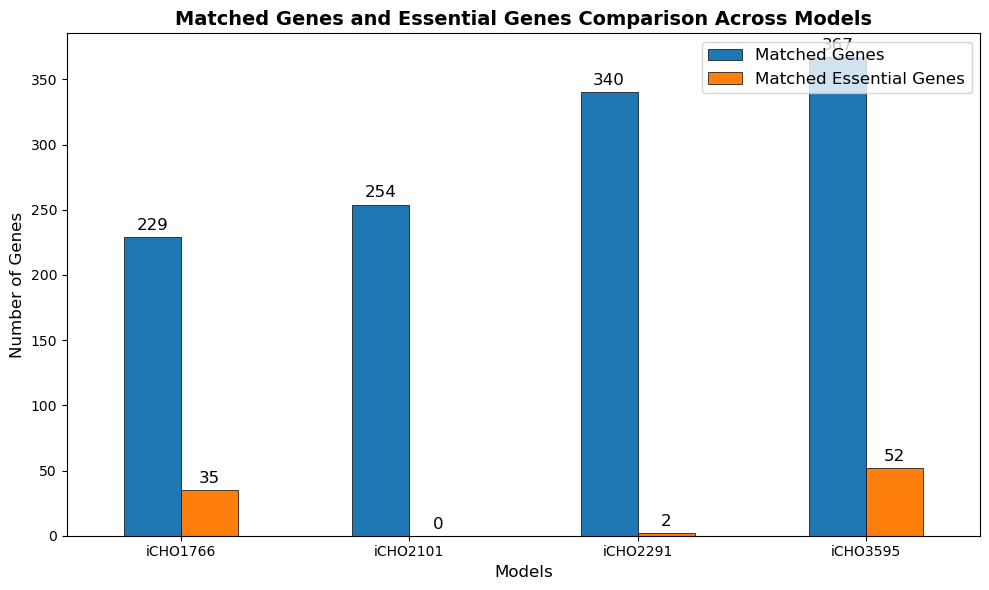

In [42]:
# Plotting the bar chart
ax = counts_df.T.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=0.5)

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontsize=12)

# Set titles and labels
ax.set_title('Matched Genes and Essential Genes Comparison Across Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Genes', fontsize=12)
ax.set_xlabel('Models', fontsize=12)

# Add legend and show plot
plt.legend(['Matched Genes', 'Matched Essential Genes'], loc='upper right', fontsize=12)
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal
plt.tight_layout()
plt.show()


#### Comparing the list of essential genes iCHO2291 vs iCHO3K

### Memote

In [ ]:
# !pip install memote
!pip install --upgrade typing_extensions
# !pip install --upgrade pip

In [ ]:
import sys # loading commands to control/navigate within the system architecture
# Loading pandas, a library for data manipulation
import os
import xlrd

# Loading numpy, a library fo manipulation of numbers
import numpy as np

# loading matplotlib, a library for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# loading Memote, quality assessment of GSMM
from memote import test_model, snapshot_report

In [ ]:
mem_return, mem_result = test_model(model, results=True)
with open('iOpol_MemoteReport.html', 'w') as f:
    f.write(snapshot_report(mem_result))

In [ ]:
gene_deletion_results = single_gene_deletion(model)
essentiality_threshold = 0.01
essential_genes = gene_deletion_results[gene_deletion_results['growth'] < essentiality_threshold]

In [ ]:
# Assuming 'df' contains 'gene' and 'entrez_gene_id'
# Create a reverse lookup dictionary where the key is the Entrez Gene ID and the value is the gene symbol
entrez_dict = df.set_index('entrez_gene_id')['gene'].to_dict()

# Print the essential genes and match them with Entrez Gene IDs
print(f"Number of essential genes for biomass: {len(essential_genes)}")
print("Essential genes for biomass production with matching Entrez IDs:")

# Create an empty list to store the results
matched_genes = []

for gene_idx in essential_genes.index:
    gene_exp_ess = model.genes[gene_idx]
    
    # Check if the gene.id matches any Entrez Gene ID (value) in the reverse dictionary
    if gene_exp_ess.id in entrez_dict:
        # If it matches, retrieve the corresponding gene symbol
        entrez_gene_symbol = entrez_dict[gene_exp_ess.id]
        print(f"{gene_exp_ess.id}: {gene_exp_ess.name}, Entrez Gene Symbol: {entrez_gene_symbol}")
        
        # Append the matched result to the list
        matched_genes.append((gene_exp_ess.id, gene_exp_ess.name, entrez_gene_symbol))
    else:
        print(f"{gene_exp_ess.id}: {gene_exp_ess.name}, No Entrez Gene Match")

# Convert the matched list into a DataFrame if needed
matched_genes_essential_df = pd.DataFrame(matched_genes, columns=['gene_exp_ess.id', 'gene_exp_ess.name', 'entrez_gene_symbol'])

# Save the result to a CSV file if desired
matched_genes_essential_df.to_csv("matched_gene_entrez_ids.csv", index=False)

# Print or return the DataFrame for further use
print(matched_genes_df)

# Create an empty list to store the results
matched_genes_model = []

# Iterate through all genes in the model
for gene in model.genes:
    # Check if the gene.id (or gene.name) matches any Entrez Gene ID in the dictionary
    if gene.id in entrez_dict:  # Here we're assuming gene.id matches the entrez_gene_id
        entrez_gene_symbol = entrez_dict[gene.id]  # Get the corresponding gene symbol
        print(f"Model gene.id: {gene.id}, Gene name: {gene.name}, Matched Entrez Gene Symbol: {entrez_gene_symbol}")
        
        # Append the matched gene information to the list
        matched_genes_model.append((gene.id, gene.name, entrez_gene_symbol))
    else:
        print(f"Model gene.id: {gene.id}, Gene name: {gene.name}, No match found.")

# Convert the matched genes list to a DataFrame
matched_genes_df = pd.DataFrame(matched_genes_model, columns=['gene.id', 'gene.name', 'entrez_gene_symbol'])

# Save the result to a CSV file if needed
matched_genes_df.to_csv("matched_model_genes.csv", index=False)

# Print or return the matched genes DataFrame
print(matched_genes_df)

In [ ]:
print(entrez_dict)

In [ ]:
essential_genes_model = []
for g in model.genes:
    if g.name in all_gene_names:
        essential_genes_model.append(g)

In [ ]:
set1 = set(sim_essential_genes)
set2 = set(essential_genes_model)

# Find shared elements
shared_elements = set1.intersection(set2)

# Find unique elements
unique_in_list1 = set1.difference(set2)
unique_in_list2 = set2.difference(set1)

In [ ]:
print("Shared genes between Exp Validated Essential Genes and Simulated Essential Genes:", len(shared_elements))
print("Unique genes in Simulated Essential Genes:", len(unique_in_list1))
print("Unique genes in Exp Validated Essentail Genes:", len(unique_in_list2))

##### Essential for growth genes and comparison to (An optimised genome-wide, virus free CRISPR screen for mammalian cells)
https://pubmed.ncbi.nlm.nih.gov/34935002/

## 2. Context-specific Model Generation <a id='context_specific'></a>

Here we use a matrix generated with rmf_CADRE to generate each context_specific model for each one of the conditions.

In [ ]:
import pickle
import pandas as pd
from scipy.io import loadmat
from time import process_time

import pymCADRE
from pymCADRE.rank import rank_reactions
from pymCADRE.check import check_model_function
from pymCADRE.prune import prune_model

import cobra
from cobra.io import load_json_model

### Define Intervals for Context-specific model generation
Here we define the set of constraints in the uptake and secretion rates that we want to incorporate to our context specific models

#### Model Loading and Constraining

In [ ]:
# Load generic model
model = load_json_model('iCHO3595_unblocked.json')

In [ ]:
# Load uptake and secretion rate "Intervals dict

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_wt_dict.pkl', 'rb') as file:
    uptsec_intrvl_wt = pickle.load(file)

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_intrvl_zela_dict.pkl', 'rb') as file:
    uptsec_intrvl_zela = pickle.load(file)

In [ ]:
temp_dict = uptsec_intrvl_zela
time = 'P2 to P4'

with model as model:
    model.reactions.biomass_cho_s.bounds = temp_dict['exp_growth_rate'][time]
    for rxn in model.boundary:
        
        # Models that are forced to secrete ethanol are not feasible
        if rxn.id == 'EX_etoh_e':
            rxn.bounds = (-0.1,0.1)
            continue

        # Replace the lower and upper bound with experimental data
        if rxn.id in temp_dict.keys():
            rxn.bounds = temp_dict[rxn.id][time]
            continue
        
        # Keep boundaries open for essential metabolites
        if rxn.id == 'EX_h2o_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_h_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_o2_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_hco3_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_so4_e':
            rxn.bounds = (-1000,1000)
            continue
        if rxn.id == 'EX_pi_e':
            rxn.bounds = (-1000,1000)
            continue

        # Boundaries from Sink reactions on iCHO_v1 (100 times lower)
        if rxn.id == 'SK_Asn_X_Ser_Thr_r':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_Tyr_ggn_c':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_Ser_Thr_g':
            rxn.bounds = (-0.001,1000)
            continue
        if rxn.id == 'SK_pre_prot_r':
            rxn.bounds = (-0.0006,1000)
            continue

        # Close uptake rates for the rest of the boundaries
        if rxn.id.startswith("EX_"):
            rxn.bounds = (0,1000) 
        if rxn.id.startswith("SK_"):
            rxn.bounds = (0,1000)
        if rxn.id.startswith("DM_"):
            rxn.bounds = (0,1000)
        
    pfba_solution = cobra.flux_analysis.pfba(model)
    pfba_obj = pfba_solution.fluxes[objective]
    print(pfba_obj)

### Loading Ubiquity and Confidence Scores

In [ ]:
# Load the .mat file
mat_data = loadmat('../Data/Context_specific_models/ubiData.mat')

# Access the ubiData structure
ubiData = mat_data['ubiData']

# Accessing individual fields within ubiData
ubiScores = ubiData['ubiScores'][0, 0]
uScore = ubiData['uScore'][0, 0]
rxns = ubiData['rxns'][0, 0]
Condition = ubiData['Condition'][0, 0]

# Print or process the data as needed
print(ubiScores.shape)
print(uScore.shape)
print(rxns.shape)
print(Condition.shape)

In [ ]:
for i,cond in enumerate(Condition[0]):
    if "WT_P4" in cond[0]:
        print(cond[0], i)
    elif "ZeLa_P4" in cond[0]:
        print(cond[0], i)

In [ ]:
Condition[0][0]

In [ ]:
# Ubiquity score list
U = list(ubiScores[:,0])

In [ ]:
# Conf Score List
conf_scores = pd.read_csv('../Data/Context_specific_models/confidence_scores.csv', header=None).iloc[:, 0].tolist()

In [ ]:
# Protected Reations
high_confidence_reactions = ['biomass_cho_s', 'DNAsyn', 'LipidSyn_cho_s', 'PROTsyn_cho_s', 'RNAsyn_cho_s', 'EX_bhb_e', 'EX_nh4_e', 'EX_ac_e', 'EX_ala_L_e',
    'EX_arg_L_e', 'EX_asn_L_e', 'EX_asp_L_e', 'EX_2hb_e', 'EX_cit_e', 'EX_cys_L_e', 'EX_etoh_e', 'EX_for_e', 'EX_fum_e', 'EX_glc_e', 'EX_glu_L_e',
    'EX_gln_L_e', 'EX_gly_e', 'EX_his_L_e', 'EX_4hpro_e', 'EX_ile_L_e', 'EX_lac_L_e', 'EX_leu_L_e', 'EX_lys_L_e', 'EX_mal_L_e', 'EX_met_L_e',
    'EX_phe_L_e', 'EX_pro_L_e', 'EX_5oxpro_e', 'EX_pyr_e', 'EX_ser_L_e', 'EX_thr_L_e', 'EX_trp_L_e', 'EX_tyr_L_e', 'EX_val_L_e', 'EX_h2o_e',
    'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e', 'SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r'
]

### Reduced model generation

In [ ]:
##############################################
# Rank reactions
##############################################

print('Processing inputs and ranking reactions...')
GM, C, NC, P, Z, model_C = rank_reactions(model, U, conf_scores, high_confidence_reactions, method=1)

In [ ]:
# Output the results
print("Generic Model:", GM)
print("Core Reactions:", len(C))
print("Non-Core Reactions:", len(NC))
print("Ranked Non-Core Reactions:", len(P))
print("Zero-Expression Reactions:", len(Z))
print("Core Reactions in Original Model:", len(model_C))

In [ ]:
from cobra.util import create_stoichiometric_matrix

def retrieve_precursor_metabolites(model, protected_rxns):
    """
    Retrieve precursor metabolites from a specified list of reactions in a metabolic model.

    Args:
        model: cobra.Model - The metabolic model.
        protected_rxns: list - A list of reaction IDs for which precursor metabolites need to be retrieved.

    Returns:
        precursor_mets: list - A list of precursor metabolites.
    """

    # Create a list of all the reactions in the model
    model_reactions = [r.id for r in model.reactions]
    
    # Ensure that the protected reactions list is not empty
    if protected_rxns:
        
        #Define a list to store the indices of the protected reactions
        rxn_indices = []
        
        for rxn in protected_rxns:
            # Ensure that the protected reaction is included in the model
            if rxn in model_reactions:
                # Get the indices of the protected reactions in the model, only if the reaction exists
                rxn_indices.append(model.reactions.index(model.reactions.get_by_id(rxn)))

        # Create stoichiometric matrix S
        S = create_stoichiometric_matrix(model)
        
        # Retrieve precursor metabolites: metabolites with a negative coefficient in the stoichiometric matrix
        precursor_mets = [
            model.metabolites[i] 
            for i in range(len(model.metabolites)) 
            if any(S[i, idx] < 0 for idx in rxn_indices)
        ]

        return precursor_mets
    else:
        return []

In [ ]:
precursor_mets = retrieve_precursor_metabolites(model, high_confidence_reactions)

In [ ]:
##################################################
# Define inputs to the model pruning step
##################################################

# Define core vs. non-core ratio threshold for removing reactions
eta = 1 / 3

# Check functionality of generic model
genericStatus = check_model_function(GM, 'required_mets', precursor_mets)[0]
print(genericStatus)

In [ ]:
# Constraint the model with exp data

time = 'P2 to P4'

GM.solver = 'gurobi'
objective = 'biomass_cho_s' # 'biomass_cho'
GM.objective = objective

GM.reactions.biomass_cho_s.bounds = temp_dict['exp_growth_rate'][time]
for rxn in GM.boundary:
    
    # Models that are forced to secrete ethanol are not feasible
    if rxn.id == 'EX_etoh_e':
        rxn.bounds = (-0.1,0.1)
        continue

    # Replace the lower and upper bound with experimental data
    if rxn.id in temp_dict.keys():
        rxn.bounds = temp_dict[rxn.id][time]
        continue
    
    # Keep boundaries open for essential metabolites
    if rxn.id == 'EX_h2o_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_h_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_o2_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_hco3_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_so4_e':
        rxn.bounds = (-1000,1000)
        continue
    if rxn.id == 'EX_pi_e':
        rxn.bounds = (-1000,1000)
        continue

    # Boundaries from Sink reactions on iCHO_v1 (100 times lower)
    if rxn.id == 'SK_Asn_X_Ser_Thr_r':
        rxn.bounds = (-0.001,1000)
        continue
    if rxn.id == 'SK_Tyr_ggn_c':
        rxn.bounds = (-0.001,1000)
        continue
    if rxn.id == 'SK_Ser_Thr_g':
        rxn.bounds = (-0.001,1000)
        continue
    if rxn.id == 'SK_pre_prot_r':
        rxn.bounds = (-0.0006,1000)
        continue

    # Close uptake rates for the rest of the boundaries
    if rxn.id.startswith("EX_"):
        rxn.bounds = (0,1000) 
    if rxn.id.startswith("SK_"):
        rxn.bounds = (0,1000)
    if rxn.id.startswith("DM_"):
        rxn.bounds = (0,1000)
    
pfba_solution = cobra.flux_analysis.pfba(GM)
pfba_obj = pfba_solution.fluxes[objective]
print(pfba_obj)

In [ ]:
if genericStatus:
    print('Generic model passed precursor metabolites test')

    ##############################################################
    # If generic functionality test is passed, prune reactions
    ###############################################################
    print('Pruning reactions...')
    t0 = process_time()
    PM, cRes = prune_model(GM, P, C, Z, eta, precursor_mets, salvage_check=0, method=1)
    # Stop the stopwatch / counter
    t_stop = process_time()
    # compute elapsed time
    pruneTime = t_stop - t0

else:
    print('Generic model failed precursor metabolites test!!')

### ATP Generation loops removal

In [ ]:
from itertools import chain
import pickle
import numpy as np
from optlang.symbolics import Zero

import cobra
from cobra.util import create_stoichiometric_matrix
from cobra.io import load_json_model

#### Loading and Constraining Model

In [ ]:
model = load_json_model('iCHO3595_unblocked.json')

In [ ]:
with open('../Data/Uptake_Secretion_Rates/uptake_secretion_raw_zela_dict.pkl', 'rb') as file:
    uptsec_zela = pickle.load(file)

for rxn in model.boundary:
    if rxn.id in ['EX_h2o_e', 'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e']:
        rxn.bounds = (-1000, 1000)
    elif rxn.id in ['SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r']:
        rxn.bounds = (-0.001, 1000)
    elif rxn.id.startswith(("EX_", "SK_", "DM_")):
        rxn.bounds = (0, 1000)  # Close uptake rates for others

for reaction in model.reactions:
    if reaction.id == 'EX_etoh_e': #Model creates infeasible solutions when secreting etoh
        continue
    elif reaction.id == 'ATPM': # Add ATP Maintenance Cost
        reaction.lower_bound = 0
    for r,v in uptsec_zela.items():
        if reaction.id == r:
            reaction.upper_bound = 1000
            reaction.lower_bound = v[('U6','P2 to P4')]

#### ATP loops removal

In [ ]:
#########################################
# Thanasis' original version
#########################################


# Get the maximum flux through the oxidatitve phosphoryaltion pathway. Get the maximum flux of the objectives, biomass and IgG. 
# If a reaction that consumes ATP (negative stoichiometric coefficient), has a flux value below a cutoff in both maximisation of biomass
# IgG and ox. pho. pathway, then the reaction doesn't provide any useable ATP (cyclic)

step6_safe_rxn_rmv = []

protected_subsystems = [ # Why protecting these subsystems
    'BIOMASS', 'Product Formation', 'OXIDATIVE PHOSPHORYLATION', 'CITRIC ACID CYCLE', 'GLYCOLYSIS/GLUCONEOGENESIS',
    'PYRUVATE METABOLISM', 'PENTOSE PHOSPHATE PATHWAY', 'GLUTAMATE METABOLISM', 'NAD METABOLISM',
    'TRANSPORT, MITOCHONDRIAL', 'TRANSPORT, ENDOPLASMIC RETICULAR', 'ARGININE AND PROLINE METABOLISM',
    'UBIQUINONE SYNTHESIS', 'VALINE, LEUCINE, AND ISOLEUCINE METABOLISM', 'TRYPTOPHAN METABOLISM',
    'METHIONINE AND CYSTEINE METABOLISM', 'TYROSINE METABOLISM', 'GLYCINE, SERINE, AND THREONINE METABOLISM',
    'HISTIDINE METABOLISM', 'ALANINE AND ASPARTATE METABOLISM', 'PHENYLALANINE METABOLISM',
    'LYSINE METABOLISM', 'TYROSINE METABOLISM', 'N-GLYCAN BIOSYNTHESIS', 'PROTEIN PRODUCTION', 'SECRETORY PATHWAY'
]


# biomass and igg reactions of the model; we want to ensure their production after removals of any ATP cycles
biomass_rxn = 'biomass_cho_s'
igg_rxn = 'igg_formation'

model.objective = biomass_rxn
biomass_control = model.optimize('maximise')
model.objective = igg_rxn
igg_control = model.optimize('maximise')
print("Original: Biomass: ", round(biomass_control.objective_value, 5), "IgG: ", round(igg_control.objective_value, 5))

model_temp = model.copy()
atp_related_mets = ['atp_c', 'atp_n', 'atp_m', 'atp_x'] # What about atp_l, atp_g, atp_r, atp_e
atp_met_indices = [model_temp.metabolites.get_by_id(met) for met in atp_related_mets]

# Find the reactions associated with these metabolites
atp_rxns_indices = []
for met in atp_met_indices:
    for reac in met.reactions:
        atp_rxns_indices.append(reac.id)
atp_rxns_indices = list(set(atp_rxns_indices))

# Determine which reactions are consuming ATP (negative stoichiometry for ATP)
atp_consumption_idx = []
stoich_matrix = create_stoichiometric_matrix(model_temp)
for atp_rxn in atp_rxns_indices:
    reaction = model_temp.reactions.get_by_id(atp_rxn)
    if not reaction.reversibility:  # Only irreversible reactions
        for met in atp_met_indices:
            if stoich_matrix[model_temp.metabolites.index(met), model_temp.reactions.index(reaction)] < 0:
                atp_consumption_idx.append(atp_rxn)
                break

# Perform FBA to get maximum ATP production
model_temp.objective = 0
oxpho_rxns = [r for r in model_temp.reactions if 'OXIDATIVE PHOSPHORYLATION' in r.subsystem]
reaction_variables = ((rxn.forward_variable, rxn.reverse_variable) for rxn in oxpho_rxns)
variables = chain(*reaction_variables)
model_temp.objective = model_temp.problem.Objective( Zero, direction="max", sloppy=True, name="maxATP" )
model_temp.objective.set_linear_coefficients({v: 1.0 for v in variables})
print("objective function", model_temp.objective.expression)
solution_maxATP = model_temp.optimize()

for obj in [biomass_rxn, igg_rxn]:
    model_temp.objective = obj
    sol = model_temp.optimize('maximize')
    atp_rate = np.vstack([sol[atp_consumption_idx], solution_maxATP[atp_consumption_idx]])

    # Find ATP consuming reactions with low rates
    atp_rxn_lowFlux = [id for id, rate in zip(atp_consumption_idx, np.sum(atp_rate, axis=0)) if rate <= 2e-12]

    atp_loop_rxn_rmv = []
    for rxn in atp_rxn_lowFlux:
        if model_temp.reactions.get_by_id(rxn).subsystem not in protected_subsystems:
            atp_loop_rxn_rmv.append(rxn)

    # Filter out exchange reactions
    exchange_reactions = [r.id for r in model_temp.exchanges]
    atp_loop_rxn_rmv = [r_id for r_id in atp_loop_rxn_rmv if r_id not in exchange_reactions]

    # Ensure ATP maintenance reaction is not deleted
    id_atp_maint = model_temp.reactions.get_by_id('ATPM').id
    atp_loop_rxn_rmv = [r_id for r_id in atp_loop_rxn_rmv if r_id != id_atp_maint]

    if obj == biomass_rxn:
        atp_loop_rxns_bio = atp_loop_rxn_rmv
    elif obj == igg_rxn:
        atp_loop_rxns_igg = atp_loop_rxn_rmv

# Print the reactions to be deleted
atp_loop_rxns = list(set(atp_loop_rxns_igg).intersection(atp_loop_rxns_bio))
print("Reactions to be deleted:", len(atp_loop_rxns))

# Remove reactions from the model and check that Biomass and IgG are produced
model_temp.objective = biomass_rxn
sol_bio_control = model_temp.optimize('maximize')
model_temp.objective = igg_rxn
sol_igg_control = model_temp.optimize('maximize')
model_temp_temp = model_temp.copy()

for rxn_to_rmv in atp_loop_rxns:
    model_temp_temp.remove_reactions(rxn_to_rmv)
    model_temp_temp.objective = biomass_rxn
    sol_bio = model_temp_temp.optimize('maximize')
    model_temp_temp.objective = igg_rxn
    sol_igg = model_temp_temp.optimize('maximize')
    if round(sol_bio.objective_value, 5) == round(sol_bio_control.objective_value, 5) and round(sol_igg.objective_value, 5) == round(sol_igg_control.objective_value, 5):
        step6_safe_rxn_rmv.append(rxn_to_rmv)

model_temp.remove_reactions(step6_safe_rxn_rmv)
print("Reactions consuming ATP in a cyclic fashion AND are safe to remove: ", len(step6_safe_rxn_rmv))
print("Model size after the removal of ATP cyclic reactions: Reactions: ", len(model_temp.reactions), "Metabolites: ", len(model_temp.metabolites))
model_temp.objective = biomass_rxn
sol_bio = model_temp.optimize('maximize')
model_temp.objective = igg_rxn
sol_igg = model_temp.optimize('maximize')
print("Old Bio: ", round(sol_bio_control.objective_value, 3), "New Bio: ", round(sol_bio.objective_value, 3), "Old IgG: ", round(sol_igg_control.objective_value, 5), "New IgG: ", round(sol_igg.objective_value, 5))
model = model_temp.copy()

In [ ]:
#########################################
# Pablo's modification
#########################################
from tqdm import tqdm


def get_atp_related_reactions(model, atp_mets):
    """ Get reactions associated with ATP and related metabolites like GTP, GDP, etc. """
    atp_rxns_indices = set()  # Use set to avoid duplicates
    for met in atp_mets:
        for reac in met.reactions:
            if any(x in reac.reactants + reac.products for x in atp_mets):
                atp_rxns_indices.add(reac.id)
    return list(atp_rxns_indices)

def find_low_flux_reactions(model, atp_rxns_indices, atp_met_indices, stoich_matrix, consumption_cutoff=2e-12):
    """ Identify reactions with low ATP or related metabolite consumption flux. """
    atp_consumption_idx = []
    for atp_rxn in atp_rxns_indices:
        reaction = model.reactions.get_by_id(atp_rxn)
        for met in atp_met_indices:
            # Check for both ATP and GTP-related consumption (stoichiometric coefficient < 0)
            if stoich_matrix[model.metabolites.index(met), model.reactions.index(reaction)] < 0:
                atp_consumption_idx.append(atp_rxn)
                break
    return atp_consumption_idx

def perform_fba_for_max_atp(model, oxpho_rxns):
    """ Set FBA objective to maximize ATP production. """
    reaction_variables = ((rxn.forward_variable, rxn.reverse_variable) for rxn in oxpho_rxns)
    variables = chain(*reaction_variables)
    model.objective = model.problem.Objective(Zero, direction="max", sloppy=True, name="maxATP")
    model.objective.set_linear_coefficients({v: 1.0 for v in variables})
    return model.optimize()

def remove_cyclic_atp_reactions(model, atp_rxns_to_remove, biomass_rxn):
    """ Remove reactions consuming ATP in a cyclic fashion and check for safety. """
    
    safe_rxn_irrev = []

    # Copy the original model
    temp_model = model.copy()

    # Set the objective for the temporary model
    temp_model.objective = biomass_rxn
    sol_bio_control = temp_model.optimize()

    # Cumulative list of safe reactions to remove or modify
    candidate_safe_rmv = []
    candidate_safe_irrev = []

    for rxn_id in tqdm(atp_rxns_to_remove, desc="Processing reactions"):
        with temp_model:
            # Try to make the reaction irreversible
            if temp_model.reactions.get_by_id(rxn_id).lower_bound != 0:
                temp_model.reactions.get_by_id(rxn_id).bounds = (0, 1000)
                sol_bio_temp = temp_model.optimize()
                
                if (round(sol_bio_temp.objective_value, 5) == round(sol_bio_control.objective_value, 5)):
                    candidate_safe_irrev.append(rxn_id)
                    
                    # Test cumulative effect of all candidate modifications
                    for rxn in candidate_safe_irrev:
                        temp_model.reactions.get_by_id(rxn).bounds = (0, 1000)
                    sol_bio_cumulative = temp_model.optimize()

                    # If the cumulative effect is still safe, add to the final modification list
                    if round(sol_bio_cumulative.objective_value, 5) == round(sol_bio_control.objective_value, 5):
                        safe_rxn_irrev = list(candidate_safe_irrev)
                    else:
                        # If not safe, undo the last added irreversible modification
                        candidate_safe_irrev.remove(rxn_id)
                        print(f"Making {rxn_id} irreversible is not safe, reverting.")

    # Make irreversible reactions that can be safely modified
    for rxn in safe_rxn_irrev:
        if model.reactions.get_by_id(rxn).lower_bound != 0:
            model.reactions.get_by_id(rxn).bounds = (0, 1000)
    
    return model, safe_rxn_irrev

# Set objectives
biomass_rxn = 'biomass_cho_s'
model.objective = biomass_rxn
biomass_control = model.optimize('maximize')

# Find ATP related reactions
atp_related_mets = ['atp_c', 'atp_n', 'atp_m', 'atp_x', 'atp_l', 'atp_g', 'atp_r', 'atp_e', 'datp_c', 'dadp_c', 'gtp_c', 'gdp_c',
                    'utp_c', 'udp_c', 'ctp_c', 'cdp_c', 'ump_c', 'mlthf_c', 'mlthf_m', 'dgtp_c', 'dgdp_c', 'adxrd_c', 'adxrd_m',
                    'adxo_2_2_m', 'adxo_2_2_c', 'udpg_c', 'udpgal_c', 'succ_m', 'succoa_m', '4met2obut_c', 'q10h2_m', 'q10_m']
atp_met_indices = [model.metabolites.get_by_id(met) for met in atp_related_mets]
atp_rxns_indices = get_atp_related_reactions(model, atp_met_indices)

# Create stoichiometric matrix
stoich_matrix = create_stoichiometric_matrix(model)
atp_consumption_idx = find_low_flux_reactions(model, atp_rxns_indices, atp_met_indices, stoich_matrix)

# Maximize ATP production
oxpho_rxns = [r for r in model.reactions if 'OXIDATIVE PHOSPHORYLATION' in r.subsystem]
solution_maxATP = perform_fba_for_max_atp(model, oxpho_rxns)

# Check flux of ATP consuming reactions
atp_loop_rxn_rmv = []

model.objective = biomass_rxn
sol = model.optimize('maximize')
atp_rate = np.vstack([sol[atp_consumption_idx], solution_maxATP[atp_consumption_idx]])

# Find low flux ATP reactions
atp_rxn_lowFlux = [rxn_id for rxn_id, rate in zip(atp_consumption_idx, np.sum(atp_rate, axis=0)) if rate <= 2e-12]

# Filter protected subsystems and exchanges
protected_subsystems = ['BIOMASS', 'OXIDATIVE PHOSPHORYLATION']
atp_loop_rxn_rmv += [rxn for rxn in atp_rxn_lowFlux if model.reactions.get_by_id(rxn).subsystem not in protected_subsystems]

# Ensure ATPM and exchange reactions are not removed
atp_loop_rxn_rmv = [r_id for r_id in atp_loop_rxn_rmv if r_id != 'ATPM' and not r_id.startswith("EX_")]

# Remove duplicates in the list
atp_loop_rxn_rmv = set(atp_loop_rxn_rmv)

# Remove cyclic ATP reactions and check safety
pruned_model, safe_rxn_irrev = remove_cyclic_atp_reactions(model, atp_loop_rxn_rmv, biomass_rxn)

print(f"Reactions consuming ATP in a cyclic fashion and safe to make irreversible: {len(safe_rxn_irrev)}")

# Final biomass
pruned_model.objective = biomass_rxn
sol_bio = pruned_model.optimize('maximize')

print(f"Old Bio: {biomass_control.objective_value:.3f}, New Bio: {sol_bio.objective_value:.3f}")

### Test

In [ ]:
with pruned_model as model:
    objective = 'biomass_cho_s'
    model.objective = objective
    '''
    model.reactions.SCP22x.knock_out()
    model.reactions.TMNDNCCOAtx.knock_out()
    model.reactions.OCCOAtx.knock_out()
    model.reactions.TMNDNCCOAtx.knock_out()
    model.reactions.r0391.knock_out()
    model.reactions.BiGGRxn67.knock_out()
    model.reactions.r2247.knock_out()
    model.reactions.r2280.knock_out()
    model.reactions.r2246.knock_out()

    
    model.reactions.r2279.knock_out()
    model.reactions.r2245.knock_out()
    model.reactions.r2305.knock_out()
    model.reactions.r2317.knock_out()
    model.reactions.r2335.knock_out()
    model.reactions.HMR_0293.knock_out()
    model.reactions.HMR_7741.knock_out()
    model.reactions.r0509.knock_out()
    model.reactions.r1453.knock_out()
    model.reactions.HMR_4343.knock_out()

    
    model.reactions.ACONTm.knock_out()
    model.reactions.PDHm.knock_out()
    model.reactions.r0426.knock_out()
    model.reactions.r0383.knock_out()
    model.reactions.r0555.knock_out()
    model.reactions.r1393.knock_out()
    model.reactions.NICRNS.knock_out()
    model.reactions.get_by_id('GAUGE-R00648').knock_out()
    model.reactions.get_by_id('GAUGE-R03326').knock_out()
    model.reactions.get_by_id('GapFill-R08726').knock_out()

    
    model.reactions.RE2915M.knock_out()
    model.reactions.HMR_3288.knock_out()
    model.reactions.HMR_1325.knock_out()
    model.reactions.HMR_7599.knock_out()
    model.reactions.r1431.knock_out()
    model.reactions.r1433.knock_out()
    model.reactions.RE2439C.knock_out()
    model.reactions.r0082.knock_out()
    model.reactions.r0791.knock_out()
    model.reactions.r1450.knock_out()

    
    model.reactions.get_by_id('GAUGE-R00270').knock_out()
    model.reactions.get_by_id('GAUGE-R02285').knock_out()
    model.reactions.get_by_id('GAUGE-R04283').knock_out()
    model.reactions.get_by_id('GAUGE-R06127').knock_out()
    model.reactions.get_by_id('GAUGE-R06128').knock_out()
    model.reactions.get_by_id('GAUGE-R06238').knock_out()
    model.reactions.get_by_id('GAUGE-R00524').knock_out()
    model.reactions.RE3477C.knock_out()

    model.reactions.AAPSAS.knock_out()
    model.reactions.RE3347C.knock_out()
    model.reactions.HMR_0960.knock_out()
    model.reactions.HMR_0980.knock_out()
    model.reactions.RE3476C.knock_out()
    model.reactions.r0708.knock_out()
    model.reactions.r0777.knock_out()
    model.reactions.r0084.knock_out()
    model.reactions.r0424.knock_out()
    model.reactions.r0698.knock_out()

    model.reactions.get_by_id('3HDH260p').knock_out()
    model.reactions.HMR_3272.knock_out()
    model.reactions.ACOAD183n3m.knock_out()
    model.reactions.HMR_1996.knock_out()
    model.reactions.get_by_id('GapFill-R01463').knock_out()
    model.reactions.get_by_id('GapFill-R04807').knock_out()
    model.reactions.r1468.knock_out()
    model.reactions.r2435.knock_out()
    model.reactions.r0655.knock_out()
    model.reactions.r0603.knock_out()

    model.reactions.r0541.knock_out()
    model.reactions.RE0383C.knock_out()
    model.reactions.HMR_1329.knock_out()
    model.reactions.TYRA.knock_out()
    model.reactions.NRPPHRt_2H.knock_out()
    model.reactions.get_by_id('GAUGE-R07364').knock_out()
    model.reactions.get_by_id('GapFill-R03599').knock_out()
    model.reactions.ARD.knock_out()
    model.reactions.RE3095C.knock_out()
    model.reactions.RE3104C.knock_out()
    model.reactions.RE3104R.knock_out()

    model.reactions.ACONT.knock_out()
    model.reactions.ACONTm.knock_out()
    model.reactions.ICDHxm.knock_out()
    model.reactions.ICDHy.knock_out()
    model.reactions.AKGDm.knock_out()
    model.reactions.r0083.knock_out()
    model.reactions.r0425.knock_out()
    model.reactions.r0556.knock_out()
    model.reactions.NH4t4r.knock_out()
    model.reactions.PROPAT4te.knock_out()
    
    model.reactions.r0085.knock_out()
    model.reactions.r0156.knock_out()
    model.reactions.r0464.knock_out()
    model.reactions.ABUTDm.knock_out()
    model.reactions.OIVD1m.knock_out()
    model.reactions.OIVD2m.knock_out()
    model.reactions.OIVD3m.knock_out()
    model.reactions.r2194.knock_out()
    model.reactions.r2202.knock_out()
    model.reactions.HMR_9617.knock_out()

    model.reactions.r2197.knock_out()
    model.reactions.r2195.knock_out()
    model.reactions.get_by_id('2OXOADOXm').knock_out()
    model.reactions.r2328.knock_out()
    model.reactions.r0386.knock_out()
    model.reactions.r0451.knock_out()
    model.reactions.FAS100COA.knock_out()
    model.reactions.FAS120COA.knock_out()
    model.reactions.FAS140COA.knock_out()
    model.reactions.FAS80COA_L.knock_out()

    model.reactions.r0604.knock_out()
    model.reactions.r0670.knock_out()
    model.reactions.r2334.knock_out()
    model.reactions.r0193.knock_out()
    model.reactions.r0595.knock_out()
    model.reactions.r0795.knock_out()
    model.reactions.GLYCLm.knock_out()
    model.reactions.MACACI.knock_out()
    model.reactions.r2193.knock_out()
    model.reactions.r0779.knock_out()
    model.reactions.r0669.knock_out()
    model.reactions.UDCHOLt.knock_out()
    model.reactions.r2146.knock_out()
    model.reactions.r2139.knock_out()
    model.reactions.r0391.knock_out()
    '''
    for rxn in model.boundary:
        if rxn.id in ['EX_h2o_e', 'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e']:
            rxn.bounds = (-1000, 1000)
        elif rxn.id in ['SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r']:
            rxn.bounds = (-0.001, 1000)
        elif rxn.id.startswith(("EX_", "SK_", "DM_")):
            rxn.bounds = (0, 1000)  # Close uptake rates for others

    for reaction in model.reactions:
        if reaction.id == 'EX_etoh_e': #Model creates infeasible solutions when secreting etoh
            continue
        elif reaction.id == 'ATPM': # Add ATP Maintenance Cost
            reaction.lower_bound = 1000
        for r,v in uptsec_zela.items():
            if reaction.id == r:
                reaction.upper_bound = 1000
                reaction.lower_bound = v[('U7','P2 to P4')]
    pfba_solution = cobra.flux_analysis.pfba(model)
    pfba_obj = pfba_solution.fluxes[objective]
    pfba_atp = pfba_solution.fluxes['ATPM']
    print(f'Simulated ATP Maintencance is: {pfba_atp}')
    print(f'Simulated growth rate is: {pfba_obj}')
    
    for i,f in pfba_solution.fluxes.items():
        if abs(f) > 1:
            print(i,f)

## 3. Biomass prediction using exp. data <a id='biomass'></a>

In [ ]:
import os
import math
import pickle
import pandas as pd

import cobra
from cobra import Reaction
from cobra.io import load_json_model, read_sbml_model, load_matlab_model
from cobra.exceptions import Infeasible
from cobra.sampling import ACHRSampler

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Model Loading

In [ ]:
# Directory containing context-specific models models
model_directory = '../Data/Context_specific_models/'

# Model Names
wt_model_names = ['WT_P4_Bio141', 'WT_P4_Bio142', 'WT_P4_Bio143',
                  'WT_P6_Bio141', 'WT_P6_Bio142', 'WT_P6_Bio143']

zela_model_names = ['ZeLa_P2_Bio145', 'ZeLa_P2_Bio146', 'ZeLa_P2_Bio147', 'ZeLa_P2_Bio148',
                    'ZeLa_P4_Bio144', 'ZeLa_P4_Bio145', 'ZeLa_P4_Bio146', 'ZeLa_P4_Bio147', 'ZeLa_P4_Bio148',
                    'ZeLa_P6_Bio144', 'ZeLa_P6_Bio146', 'ZeLa_P6_Bio147', 'ZeLa_P6_Bio148',
                    'ZeLa_P8_Bio144', 'ZeLa_P8_Bio145', 'ZeLa_P8_Bio146', 'ZeLa_P8_Bio147', 'ZeLa_P8_Bio148']

# Dictionaries to store the loaded models
wt_models = {}
zela_models = {}

# List all .mat files in the directory
model_files = [f for f in os.listdir(model_directory) if f.endswith('.mat')]

# Iterate through the .mat files and load only the models that match predefined strings
for model_file in model_files:
    # Full path to the model file
    model_path = os.path.join(model_directory, model_file)
    
    # Check if the file corresponds to a WT model
    for model_name in wt_model_names:
        if model_name in model_file:
            wt_models[model_name] = load_matlab_model(model_path)
            wt_models[model_name].id = model_name
            print(f"Loaded WT model: {model_name}")
            break  # Stop checking other names since this file is already processed
    
    # Check if the file corresponds to a ZeLa model
    for model_name in zela_model_names:
        if model_name in model_file:
            zela_models[model_name] = load_matlab_model(model_path)
            zela_models[model_name].id = model_name
            print(f"Loaded ZeLa model: {model_name}")
            break  # Stop checking other names since this file is already processed

In [ ]:
# ATP loop generating reactions

atp_reactions_list = [
    'SCP22x', 'TMNDNCCOAtx', 'OCCOAtx', 'r0391', 'BiGGRxn67', 'r2247', 'r2280', 'r2246', 'r2279', 'r2245', 
    'r2305', 'r2317', 'r2335', 'HMR_0293', 'HMR_7741', 'r0509', 'r1453', 'HMR_4343', 'ACONTm', 'PDHm', 
    'r0426', 'r0383', 'r0555', 'r1393', 'NICRNS', 'GAUGE-R00648', 'GapFill-R08726', 
    'RE2915M', 'HMR_3288', 'HMR_1325', 'HMR_7599', 'r1431', 'r1433', 'RE2439C', 'r0082', 'r0791', 'r1450', 
    'GAUGE-R00270', 'GAUGE-R02285', 'GAUGE-R04283', 'GAUGE-R06127', 'GAUGE-R06128', 'GAUGE-R06238', 
    'GAUGE-R00524', 'GAUGE-R03326', 'RE3477C', 'AAPSAS', 'RE3347C', 'HMR_0960', 'HMR_0980', 'RE3476C', 
    'r0708', 'r0777', 'r0084', 'r0424', 'r0698', '3HDH260p', 'HMR_3272', 'ACOAD183n3m', 'HMR_1996', 
    'GapFill-R01463', 'GapFill-R04807', 'r1468', 'r2435', 'r0655', 'r0603', 'r0541', 'RE0383C', 'HMR_1329', 
    'TYRA', 'NRPPHRt_2H', 'GAUGE-R07364', 'GapFill-R03599', 'ARD', 'RE3095C', 'RE3104C', 'RE3104R', 'ACONT', 
    'ACONTm', 'ICDHxm', 'ICDHy', 'AKGDm', 'r0083', 'r0425', 'r0556', 'NH4t4r', 'PROPAT4te', 'r0085', 
    'r0156', 'r0464', 'ABUTDm', 'OIVD1m', 'OIVD2m', 'OIVD3m', 'r2194', 'r2202', 'HMR_9617', 'r2197', 
    'r2195', '2OXOADOXm', 'r2328', 'r0386', 'r0451', 'FAS100COA', 'FAS120COA', 'FAS140COA', 'FAS80COA_L', 
    'r0604', 'r0670', 'r2334', 'r0193', 'r0595', 'r0795', 'GLYCLm', 'MACACI', 'r2193', 'r0779', 'r0669', 
    'UDCHOLt', 'r2146', 'r2139'
]

### Simulations

In [ ]:
# Load uptake and secretion rate dict

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_raw_wt_dict.pkl', 'rb') as file:
    uptsec_wt = pickle.load(file)

with open('../Data/Uptake_Secretion_Rates/uptake_secretion_raw_zela_dict.pkl', 'rb') as file:
    uptsec_zela = pickle.load(file)

In [ ]:
# Sanity Check. Make sure all the exchange reactions in the experimental data are present in the model and that the models ar growing

for name,model in zela_models.items():
    print('---------------------------------------')
    print(f'------------{model.id}------------')
    print('')
    print(f'Objective:{model.objective}')
    print('')
    print(f'GR1: {model.slim_optimize()}')
    exchanges = list(uptsec_wt.keys())
    
    model_ex = [r.id for r in model.boundary]
    model_reactions = [r.id for r in model.reactions]
    
    # Remove ATP loop reactions
    for atp_reaction in atp_reactions_list:
        if atp_reaction in model_reactions:
            # Knock out the reaction temporarily
            reaction = model.reactions.get_by_id(atp_reaction)
            original_bounds = reaction.bounds  # Store the original bounds to revert later
            reaction.knock_out()
            
            # Test if the model remains feasible after knocking out the reaction
            try:
                new_gr = model.slim_optimize()
                print(f'GR2 (After knocking out {atp_reaction}): {new_gr}')
                
                # Check if the model's growth rate is infeasible or close to zero
                if math.isnan(new_gr) or new_gr < 1e-6:
                    print(f'{atp_reaction} causes infeasibility. Reverting knockout.')
                    reaction.bounds = original_bounds  # Revert the bounds if infeasible
                else:
                    print(f'{atp_reaction} successfully knocked out without infeasibility.')

            except Exception as e:
                print(f'Error optimizing model after knocking out {atp_reaction}: {e}')
                # Revert the reaction bounds if an error occurs
                reaction.bounds = original_bounds

    print('')
    print('Missing reactions from exp data:')
    for ex in exchanges:
        if ex not in model_ex:
            print(ex)
    print('---------------------------------------')
    print('---------------------------------------')
    print('')
    print('')


for name,model in wt_models.items():
    print('---------------------------------------')
    print(f'------------{model.id}------------')
    print('')
    print(f'Objective:{model.objective}')
    print('---------------------------------------')
    print(f'GR: {model.slim_optimize()}')
    exchanges = list(uptsec_wt.keys())
    model_ex = [r.id for r in model.boundary]
    model_reactions = [r.id for r in model.reactions]
    
    # Remove ATP loop reactions
    for atp_reaction in atp_reactions_list:
        if atp_reaction in model_reactions:
            # Knock out the reaction temporarily
            reaction = model.reactions.get_by_id(atp_reaction)
            original_bounds = reaction.bounds  # Store the original bounds to revert later
            reaction.knock_out()
            
            # Test if the model remains feasible after knocking out the reaction
            try:
                new_gr = model.slim_optimize()
                print(f'GR2 (After knocking out {atp_reaction}): {new_gr}')
                
                # Check if the model's growth rate is infeasible or close to zero
                if math.isnan(new_gr) or new_gr < 1e-6:
                    print(f'{atp_reaction} causes infeasibility. Reverting knockout.')
                    reaction.bounds = original_bounds  # Revert the bounds if infeasible
                else:
                    print(f'{atp_reaction} successfully knocked out without infeasibility.')

            except Exception as e:
                print(f'Error optimizing model after knocking out {atp_reaction}: {e}')
                # Revert the reaction bounds if an error occurs
                reaction.bounds = original_bounds

    
    for ex in exchanges:
        if ex not in model_ex:
            print(ex)
    print('---------------------------------------')
    print('---------------------------------------')
    print('')

In [ ]:
pfba_solutions_fluxes = []

In [ ]:
# WT

results = []

objective = 'biomass_cho_s'

# Adjust the lower bound values according to the experimental growth rates in order to indetify bottlenecks
intervals = {'P0 to P2':'P2', 'P2 to P4':'P4', 'P4 to P6':'P6', 'P6 to P8':'P8', 'P8 to P12':'P12', 'P12 to P14':'P14'}
replicates = {'U1':'Bio141', 'U2':'Bio142', 'U3':'Bio143'}

for name,model in wt_models.items():
    print(f"Processing model: {name}")
    # Set lower bounds of the reactions according to the experimental data
    for interval_key, interval_model_time in intervals.items():
        if interval_model_time in name:  # Match model name with interval
            for rep_key, rep_suffix in replicates.items():
                if rep_suffix in name:  # Match replicate with model name

                     with model as modified_model:

                        # Open the bounds for the biomass reaction 
                        modified_model.reactions.biomass_cho_s.bounds = (0,1000)
                         
                        # Create a copy of the modified_model before making changes
                        pre_modification_model = modified_model.copy()
                         
                        for rxn in modified_model.boundary:
                            # Keep boundaries open for essential metabolites
                            if rxn.id in ['EX_h2o_e', 'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e']:
                                rxn.bounds = (-1000, 1000)
                            elif rxn.id in ['SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r']:
                                rxn.bounds = (-0.001, 1000)
                            elif rxn.id.startswith(("EX_", "SK_", "DM_")):
                                rxn.bounds = (0, 1000)  # Close uptake rates for others
                        
                        print(f'Calculating Growth Rate for WT Condition:{rep_key,interval_key}')
                        exp_gr = uptsec_wt['exp_growth_rate'][(rep_key,interval_key)]
                        print(f'Experimental growth rate is: {exp_gr}')
                        for reaction in modified_model.reactions:
                            if reaction.id == 'EX_etoh_e': #Model creates infeasible solutions when secreting etoh
                                continue
                            elif reaction.id == 'ATPM': # Add ATP Maintenance Cost
                                reaction.lower_bound = 8
                            for r,v in uptsec_wt.items():
                                if reaction.id == r:
                                    reaction.upper_bound = 1000
                                    reaction.lower_bound = v[(rep_key,interval_key)]
                                    
                        try:
                            pfba_solution = cobra.flux_analysis.pfba(modified_model)
                            pfba_obj = pfba_solution.fluxes[objective]
                            pfba_atp = pfba_solution.fluxes['ATPM']
                            print(f'Simulated ATP Maintencance is: {pfba_atp}')
                            print(f'Simulated growth rate is: {pfba_obj}')
            
                            # If pFBA succeeds, proceed to sampling
                            pfba_model_to_sample = modified_model
                            
                        except Infeasible:
                            print(f'Infeasible solution for replicate {rep_key} interval {interval_key}')
                            print('Reverting to the original model and retrying pFBA...')

                            for rxn in pre_modification_model.boundary:
                            # Keep boundaries open for essential metabolites
                                if rxn.id in ['EX_h2o_e', 'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e']:
                                    rxn.bounds = (-1000, 1000)
                                elif rxn.id in ['SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r']:
                                    rxn.bounds = (-0.001, 1000)
                            
                            pfba_solution = cobra.flux_analysis.pfba(pre_modification_model)
                            pfba_obj = pfba_solution.fluxes[objective]
                            pfba_atp = pfba_solution.fluxes['ATPM']
                            print(f'Simulated ATP Maintencance is: {pfba_atp}')
                            print(f'Simulated growth rate with original model is: {pfba_obj}')

                            # If pFBA with original model succeeds, proceed to sampling
                            pfba_model_to_sample = pre_modification_model

                        results.append([rep_suffix, interval_key, exp_gr, pfba_obj])
                        # Save the solution with metadata
                        pfba_solutions_fluxes.append({
                            "model": pre_modification_model.id,
                            "condition": interval_key,
                            "fluxes": pfba_solution.fluxes
                        })

                        
                         # Perform flux sampling using ACHRSampler
                        #print("Performing flux sampling...")
                        #achr_sampler = ACHRSampler(pfba_model_to_sample)
                        #samples = 5000 
                        #sampled_fluxes = achr_sampler.sample(samples)
                        
                        # Validate and save the sampled fluxes
                        #if 'v' not in achr_sampler.validate(sampled_fluxes).flatten():
                        #    print(f"Error in sampling for {rep_key}, {interval_key}")
                        #else:
                        #    f_name = f"../Simulations/flux_sampling/Sampling_{name}_{samples}.pkl"
                        #    with open(f_name, 'wb') as file:
                        #        pickle.dump(sampled_fluxes, file)
                        
# Creating a DataFrame
df_wt = pd.DataFrame(results, columns=['Hue', 'Category', 'X Axis', 'Y Axis'])

In [ ]:
df =df_wt
# Define markers for categories
markers = {
    'P0 to P2': 'p',  # Circle
    'P2 to P4': 'o',  # Circle
    'P4 to P6': 's',   # Square
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each group with different colors for hue and different shapes for categories
hues = df['Hue'].unique()
colors = plt.colormaps.get_cmap('tab10')

for hue_idx, hue in enumerate(hues):
    hue_subset = df[df['Hue'] == hue]
    for category, marker in markers.items():
        subset = hue_subset[hue_subset['Category'] == category]
        plt.scatter(subset['X Axis'], subset['Y Axis'], label=f'{hue} - {category}', marker=marker, s=100, color=colors(hue_idx))

# Add the identity line y = x
plt.plot([0.00, 0.055], [0.00, 0.055], color='red', linestyle='--')

# Set evenly distributed ticks from 0.01 to 0.08
ticks = [i / 100.0 for i in range(1, 11)]
plt.xticks(ticks=ticks, labels=[f'{i/100.0:.2f}' for i in range(1, 11)])
plt.yticks(ticks=ticks, labels=[f'{i/100.0:.2f}' for i in range(1, 11)])

# Set limits for both axes
plt.xlim(0.0, 0.055)
plt.ylim(0.0, 0.055)

# Setting the same scale for both axes
plt.gca().set_aspect('equal', adjustable='box')

# Adding labels and title
plt.xlabel('Experimental Growth Rate')
plt.ylabel('Simulated Growth Rate')
plt.title('WT')
plt.legend(title='Hue - Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.savefig('../Simulations/growth_rate_pred/bar_plot_growth_rate_wt.png')
plt.show()

In [ ]:
# ZeLa

results = []

objective = 'biomass_cho_s'

# Adjust the lower bound values according to the experimental growth rates in order to indetify bottlenecks
intervals = {'P0 to P2':'P2', 'P2 to P4':'P4', 'P4 to P6':'P6', 'P6 to P8':'P8', 'P8 to P12':'P12', 'P12 to P14':'P14'}
replicates = {'U4':'Bio144', 'U5':'Bio145', 'U6':'Bio146', 'U7':'Bio147', 'U8':'Bio148'}

for name,model in zela_models.items():
    print(f"Processing model: {name}")
    # Set lower bounds of the reactions according to the experimental data
    for interval_key, interval_model_time in intervals.items():
        if interval_model_time in name:  # Match model name with interval
            for rep_key, rep_suffix in replicates.items():
                if rep_suffix in name:  # Match replicate with model name
                    
                     with model as modified_model:

                        # Open the bounds for the biomass reaction 
                        modified_model.reactions.biomass_cho_s.bounds = (0,1000)
                         
                        # Create a copy of the modified_model before making changes
                        pre_modification_model = modified_model.copy()
 
                        for rxn in modified_model.boundary:
                            if rxn.id in ['EX_h2o_e', 'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e']:
                                rxn.bounds = (-1000, 1000)
                            elif rxn.id in ['SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r']:
                                rxn.bounds = (-0.001, 1000)
                            elif rxn.id.startswith(("EX_", "SK_", "DM_")):
                                rxn.bounds = (0, 1000)  # Close uptake rates for others

                        print(f'Calculating Growth Rate for ZeLa Condition:{rep_key,interval_key}')
                        exp_gr = uptsec_zela['exp_growth_rate'][(rep_key,interval_key)]
                        print(f'Experimental growth rate is: {exp_gr}')
                        for reaction in modified_model.reactions:
                            if reaction.id == 'EX_etoh_e': #Model creates infeasible solutions when secreting etoh
                                continue
                            elif reaction.id == 'ATPM': # Add ATP Maintenance Cost
                                reaction.lower_bound = 8
                            for r,v in uptsec_zela.items():
                                if reaction.id == r:
                                    reaction.upper_bound = 1000
                                    reaction.lower_bound = v[(rep_key,interval_key)]
                                    
                        try:
                            pfba_solution = cobra.flux_analysis.pfba(modified_model)
                            pfba_obj = pfba_solution.fluxes[objective]
                            pfba_atp = pfba_solution.fluxes['ATPM']
                            print(f'Simulated ATP Maintencance is: {pfba_atp}')
                            print(f'Simulated growth rate is: {pfba_obj}')
                            
                        except Infeasible:
                            print(f'Infeasible solution for replicate {rep_key} interval {interval_key}')
                            print('Reverting to the original model and retrying pFBA...')

                            for rxn in pre_modification_model.reactions:
                                if rxn.id in ['EX_h2o_e', 'EX_h_e', 'EX_o2_e', 'EX_hco3_e', 'EX_so4_e', 'EX_pi_e']:
                                    rxn.bounds = (-1000, 1000)
                                elif rxn.id in ['SK_Asn_X_Ser_Thr_r', 'SK_Tyr_ggn_c', 'SK_Ser_Thr_g', 'SK_pre_prot_r']:
                                    rxn.bounds = (-0.001, 1000)
                                elif rxn.id == 'ATPM': # Add ATP Maintenance Cost
                                    rxn.lower_bound = 8
                                
                            pfba_solution = cobra.flux_analysis.pfba(pre_modification_model)
                            pfba_obj = pfba_solution.fluxes[objective]
                            pfba_atp = pfba_solution.fluxes['ATPM']
                            print(f'Simulated ATP Maintencance is: {pfba_atp}')
                            print(f'Simulated growth rate with original model is: {pfba_obj}')
                            
                        results.append([rep_suffix, interval_key, exp_gr, pfba_obj])

                        # Save the solution with metadata
                        pfba_solutions_fluxes.append({
                            "model": pre_modification_model.id,
                            "condition": interval_key,
                            "fluxes": pfba_solution.fluxes
                        })
                         
                        '''
                        # Perform flux sampling using ACHRSampler
                        print("Performing flux sampling...")
                        achr_sampler = ACHRSampler(pfba_model_to_sample)
                        samples = 1 
                        sampled_fluxes = achr_sampler.sample(samples)
                        
                        # Validate and save the sampled fluxes
                        if 'v' not in achr_sampler.validate(sampled_fluxes).flatten():
                            print(f"Error in sampling for {rep_key}, {interval_key}")
                        else:
                            f_name = f"../Simulations/flux_sampling/Sampling_{name}_{samples}.pkl"
                            with open(f_name, 'wb') as file:
                                pickle.dump(sampled_fluxes, file)
                        '''
    
# Creating a DataFrame
df_zela = pd.DataFrame(results, columns=['Hue', 'Category', 'X Axis', 'Y Axis'])

In [ ]:
df =df_zela
# Define markers for categories
markers = {
    'P0 to P2': 'p',
    'P2 to P4': 'o',  # Circle
    'P4 to P6': 's',   # Square
    'P6 to P8': 'v',
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each group with different colors for hue and different shapes for categories
hues = df['Hue'].unique()
colors = plt.colormaps.get_cmap('tab10')

for hue_idx, hue in enumerate(hues):
    hue_subset = df[df['Hue'] == hue]
    for category, marker in markers.items():
        subset = hue_subset[hue_subset['Category'] == category]
        plt.scatter(subset['X Axis'], subset['Y Axis'], label=f'{hue} - {category}', marker=marker, s=100, color=colors(hue_idx))

# Add the identity line y = x
plt.plot([0.00, 0.055], [0.00, 0.055], color='red', linestyle='--')

# Set evenly distributed ticks from 0.01 to 0.08
ticks = [i / 100.0 for i in range(1,11)]
plt.xticks(ticks=ticks, labels=[f'{i/100.0:.2f}' for i in range(1, 11)])
plt.yticks(ticks=ticks, labels=[f'{i/100.0:.2f}' for i in range(1, 11)])

# Set limits for both axes
plt.xlim(0.0, 0.055)
plt.ylim(0.0, 0.055)

# Setting the same scale for both axes
plt.gca().set_aspect('equal', adjustable='box')

# Adding labels and title
plt.xlabel('Experimental Growth Rate')
plt.ylabel('Simulated Growth Rate')
plt.title('ZeLa')
plt.legend(title='Hue - Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.savefig('../Simulations/growth_rate_pred/bar_plot_growth_rate_zela.png')
plt.show()

In [ ]:
for reaction, values in uptsec_zela.items():
    plt.figure(figsize=(10, 6))
    
    # Organize data for plotting
    batches = sorted(set(k[0] for k in values.keys()))
    timepoints = ['P0 to P2', 'P2 to P4', 'P4 to P6', 'P6 to P8', 'P8 to P12', 'P12 to P14']
    
    for batch in batches:
        batch_data = [values.get((batch, tp), 0) for tp in timepoints]
        plt.plot(timepoints, batch_data, marker='o', label=batch)
    
    plt.title(f'Changes in {reaction} over time')
    plt.xlabel('Timepoints')
    plt.ylabel('Values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

In [ ]:
for reaction, values in uptsec_wt.items():
    plt.figure(figsize=(10, 6))
    
    # Organize data for plotting
    batches = sorted(set(k[0] for k in values.keys()))
    timepoints = ['P0 to P2', 'P2 to P4', 'P4 to P6', 'P6 to P8', 'P8 to P12', 'P12 to P14']
    
    for batch in batches:
        batch_data = [values.get((batch, tp), 0) for tp in timepoints]
        plt.plot(timepoints, batch_data, marker='o', label=batch)
    
    plt.title(f'Changes in {reaction} over time')
    plt.xlabel('Timepoints')
    plt.ylabel('Values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## 4. Flux Enrichment Analysis <a id='fea'></a>

In [ ]:
# OPTION 1
# Use the fluxes from the growth rate calculations to filter reactions with fluxes
# Define a cut off for the flux ??? # Plot to visualization of the flux distribution
# Run Flux Enrichment Analysis on those reactions to see pathways enriched when optimized by biomass

In [ ]:
# OPTION 2
# Transcriptomic data from cell batches / biorreactiors
# Overlay this into the recons and extract the reactions associated to the genes
# Extract a reaction vector / 
# Run Flux Enrichment Analysis

In [ ]:
import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests

def flux_enrichment_analysis(generic_model, rxn_list, attribute='subsystem'):
    
    # Check if the attribute exists in the first reaction as a proxy for all
    if not hasattr(model.reactions[0], attribute):
        raise ValueError(f'Attribute {attribute} not found in model reactions')

    # Extract attribute information for all reactions
    attribute_values = [getattr(rxn, attribute, 'None') for rxn in model.reactions]
    unique_attributes = set(attribute_values)
    
    # Count occurrences in the model and in the reaction set
    model_counts = {attr: attribute_values.count(attr) for attr in unique_attributes}
    rxn_set_counts = {attr: 0 for attr in unique_attributes}
    for rxn in rxn_list:
        rxn_attr = getattr(model.reactions.get_by_id(rxn), attribute, 'None')
        rxn_set_counts[rxn_attr] += 1

    # Calculate p-values using hypergeometric test
    M = len(model.reactions)  # Total number of reactions
    n = len(rxn_list)  # Size of reaction set
    p_values = []
    for attr in unique_attributes:
        N = model_counts[attr]  # Total reactions in group
        x = rxn_set_counts[attr]  # Reactions in group and in set
        p_value = hypergeom.sf(x-1, M, N, n)
        p_values.append(p_value)

    # Adjust p-values for multiple testing
    _, adj_p_values, _, _ = multipletests(p_values, method='fdr_bh')

    # Compile results
    results = pd.DataFrame({
        'Group': list(unique_attributes),
        'P-value': p_values,
        'Adjusted P-value': adj_p_values,
        'Enriched set size': [rxn_set_counts[attr] for attr in unique_attributes],
        'Total set size': [model_counts[attr] for attr in unique_attributes],
    }).sort_values(by='Adjusted P-value')

    return results

### Test 1: FEA on reactions active during growth rate optimization
Use the fluxes from the growth rate calculations to filter reactions with fluxes

In [ ]:
# Generate a vector of active reactions for each one of the conditions

active_reactions = []

for sol in pfba_solutions_fluxes:
    rxns_fluxes = []
    for n,f in sol['fluxes'].items():
        if f != 0:
            rxns_fluxes.append(n)
    
    active_reactions.append({
        "batch": sol['model'],
        "condition": sol['condition'],
        "flux_vector": rxns_fluxes
    })


In [ ]:
# Load generic model
model = load_json_model('iCHO3595_unblocked.json')

# Add atp demand reaction
DM_atp = Reaction('DM_atp_c')
model.add_reactions([DM_atp])
model.reactions.DM_atp_c.build_reaction_from_string('atp_c -->')
model.reactions.DM_atp_c.bounds = (0.01, 1000)

In [ ]:
# Generate FEA results for each one of the vectors generated for each condition

fea_results = []

# Load generic model
#model = load_json_model('iCHO3595_unblocked.json')

for fluxes in active_reactions:
    results = flux_enrichment_analysis(model, fluxes['flux_vector'], 'subsystem')
    fea_results.append({
        "Batch": fluxes['batch'],
        "Condition": fluxes['condition'],
        "Results": results
    })

In [ ]:
# Transform p-values to -log10

all_data = pd.DataFrame()

for result in fea_results:
    batch = result['Batch']
    temp_df = result['Results'][['Group', 'P-value']].copy()
    temp_df.columns = ['Group', f'P-value_{batch}']
    if all_data.empty:
        all_data = temp_df
    else:
        all_data = pd.merge(all_data, temp_df, on='Group', how='outer')

# Remove groups with a 0 value in all conditions (assuming a '0' value indicates non-significance)
significant_filter = (all_data.drop(columns='Group') < 0.05).any(axis=1)
filtered_data = all_data[significant_filter]
filtered_data.reset_index(inplace=True, drop=True)

# Transform the p-values
for col in filtered_data.columns:
    if col.startswith('P-value'):
        filtered_data[f'-log10_{col}'] = -np.log10(filtered_data[col])

In [ ]:
from scipy.stats import zscore

# Extract relevant columns for heatmap
heatmap_data = filtered_data[[col for col in filtered_data.columns if col.startswith('-log10')]]

# Clean column names
heatmap_data.columns = heatmap_data.columns.str.replace(r"-log10_P-value_", "", regex=True)

# Normalize the data (z-score)
normalized_data = heatmap_data.apply(zscore, axis=1)

# Prepare heatmap data
normalized_data.index = filtered_data['Group']

# Reorder columns: Group P2, P4, P6, and P8 together
columns_order = []
for phase in ['P2', 'P4', 'P6', 'P8']:
    columns_order.extend([col for col in normalized_data.columns if phase in col])

# Reorder the DataFrame
normalized_data = normalized_data[columns_order]

# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(normalized_data, annot=True, cmap="viridis", cbar_kws={'label': 'Z-score of -log10(P-value)'}, vmin=-1.5, vmax=1.5)
plt.title('Heatmap of Z-score Normalized -log10(P-values) Across Conditions', fontsize=20)
plt.xlabel('Conditions', fontsize=15)
plt.ylabel('Groups', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig('../Simulations/flux_enrichment_analysis/FEA_heatmap_all.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Filter the columns based on the presence of "P2 to P4" or "P4 to P6"
subset_df = heatmap_data.filter(regex='_P4_|_P6_')

# Normalize the data (z-score)
normalized_data = subset_df.apply(zscore, axis=1)

# Prepare heatmap data
normalized_data.index = filtered_data['Group']

# Plotting the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(normalized_data, annot=True, cmap="viridis", cbar_kws={'label': 'Z-score of -log10(P-value)'}, vmin=-1.5, vmax=1.5)
plt.title('Heatmap of Z-score Normalized -log10(P-values) Across Conditions', fontsize=20)
plt.xlabel('Conditions', fontsize=15)
plt.ylabel('Groups', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.savefig('../Simulations/flux_enrichment_analysis/FEA_heatmap_p2_p6.png', format='png', dpi=300, bbox_inches='tight')
plt.show()